In [1]:
import os, sys, shutil
import rasterio
import numpy as np
import geopandas as gpd

from glob import glob
from rasterio.warp import transform_bounds
from shapely.geometry import Polygon
from pyproj import Transformer
from matplotlib import pyplot as plt

module_path = os.path.abspath(".") + "/code"
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset import load_scenario
from Scenario_sampler import ScenarioSampler

In [2]:
# utils

def return_first_scenario(path):
    chosen_subfolder = None
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_dir() and entry.name != '.DS_Store':
                chosen_subfolder = entry.name
                break
    if chosen_subfolder is None:
        raise ValueError("No subfolder found")
    return chosen_subfolder


from datetime import datetime
def find_earliest_latest_dates(layout_path):
    """
    Find the earliest and latest dates in a layout folder.
    """
    earliest_date = None
    latest_date = None
    for filename in os.listdir(os.path.join(layout_path, "Weather_Data")):
        if filename.endswith(".txt"):
            with open(os.path.join(layout_path, "Weather_Data", filename), "r") as f:
                lines = f.readlines()
                first_date = lines[0][:15]
                last_date = lines[-1][:15]
                first_date = datetime.strptime(first_date, "%Y %m %d %H%M")
                last_date = datetime.strptime(last_date, "%Y %m %d %H%M")
                if earliest_date is None or first_date < earliest_date:
                    earliest_date = first_date
                if latest_date is None or last_date > latest_date:
                    latest_date = last_date
    return earliest_date, latest_date

In [3]:
fires_gdf = gpd.read_file("./FPA_FOD_20210617.gpkg")
fires_gdf = fires_gdf.to_crs("EPSG:4326")

/opt/anaconda3/envs/wildfire/lib/python3.11/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'FPA_FOD_20210617.gpkg': 'Fires' (default), 'NWCG_UnitIdActive_20200123'. Specify layer parameter to avoid this warning.
  result = read_func(
/opt/anaconda3/envs/wildfire/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Non-conformant content for record 1 in column DISCOVERY_DATE, 2005-02-02T00:00:00.0Z, successfully parsed
  return ogr_read(


Copied the layout tifs to sim2real_layouts
loaded the layout list
loaded the fires
0101_02057
Earliest date: 2020-09-02 00:00:00, Latest date: 2020-09-23 23:00:00
Sampler built with 18328 ignition points.


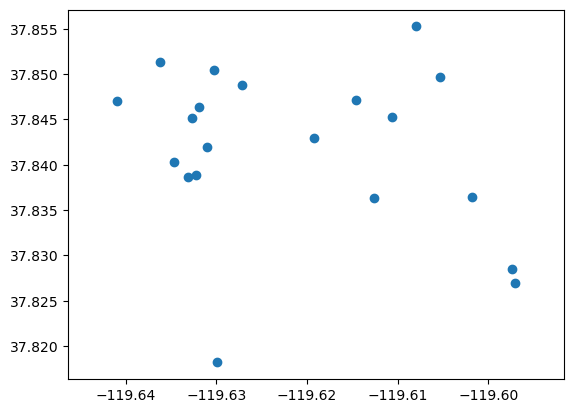

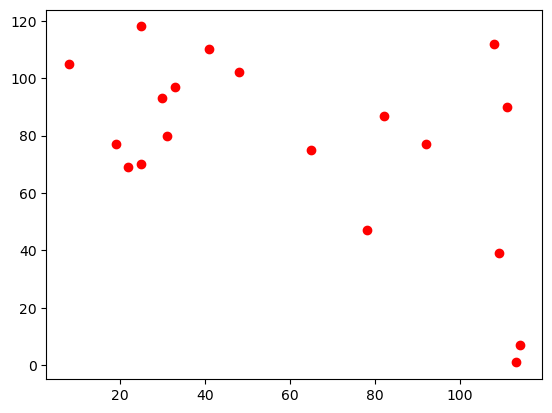

Failed 1
0279_03823
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-07 23:00:00
Sampler built with 31743 ignition points.


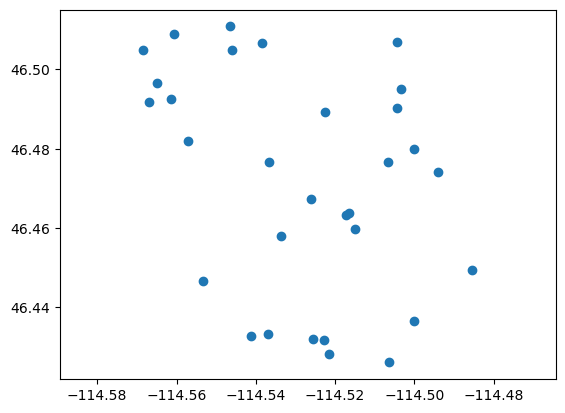

Scenario 0279_02384 has the wrong size for layout 0279_03823: 184 != 181 or 358 != 187


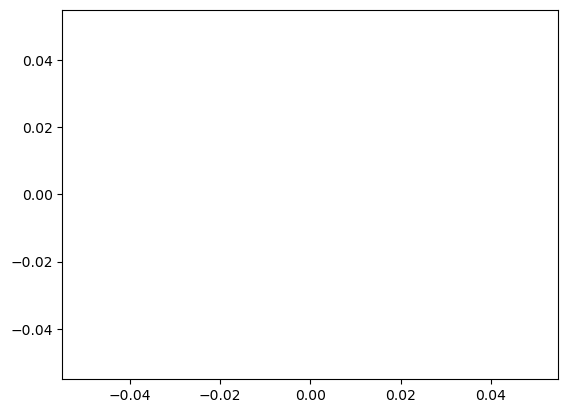

Failed 0
0280_03717
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-07 23:00:00
Sampler built with 32838 ignition points.


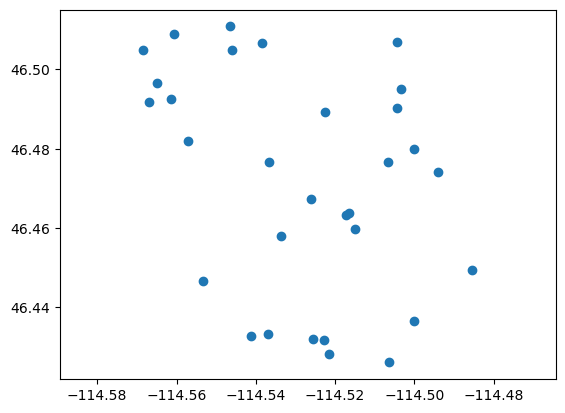

Scenario 0280_02802 has the wrong size for layout 0280_03717: 184 != 180 or 358 != 202


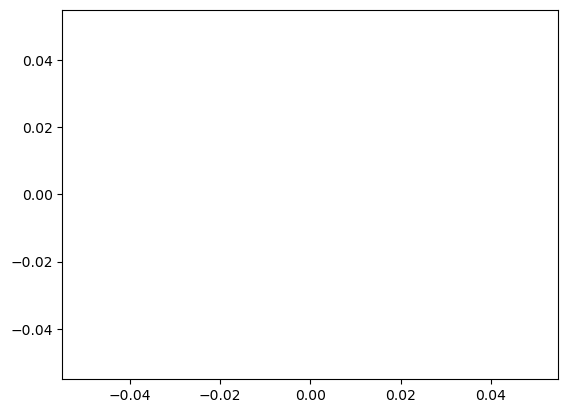

Failed 0
0014_00426
Earliest date: 2023-07-21 00:00:00, Latest date: 2023-08-09 23:00:00
Sampler built with 9406 ignition points.


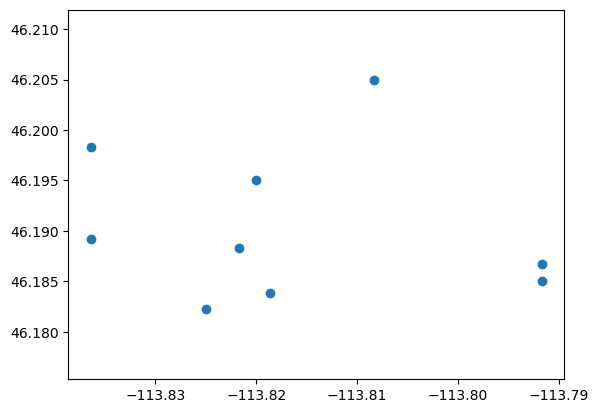

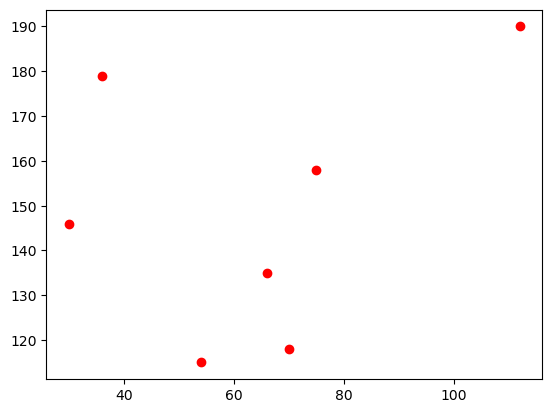

Failed 2
!! Failed 2 out of 9 for layout 0014_00426 !!
0002_00714
Earliest date: 2023-07-25 00:00:00, Latest date: 2023-08-24 23:00:00
Sampler built with 23616 ignition points.


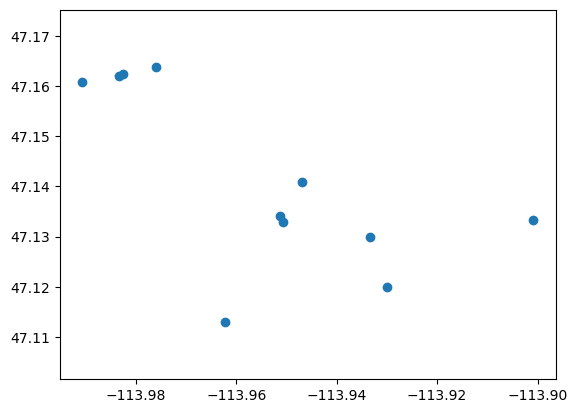

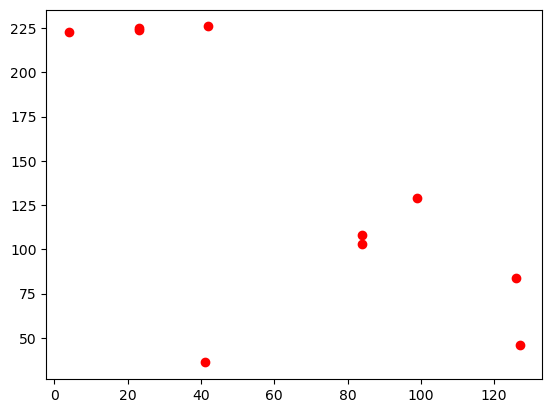

Failed 1
0046_02758
Earliest date: 2022-09-14 00:00:00, Latest date: 2022-10-05 23:00:00
Error processing 0046_00637: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00637/
Error processing 0046_00263: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00263/
Error processing 0046_01699: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_01699/
Error processing 0046_00321: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00321/
Error processing 0046_00202: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00202/
Error processing 0046_00323: No JPG files found in folder: ./WideDataset/0046_02758/Satellite_Images_Mask/0046_00323/
Sampler built with 30436 ignition points.


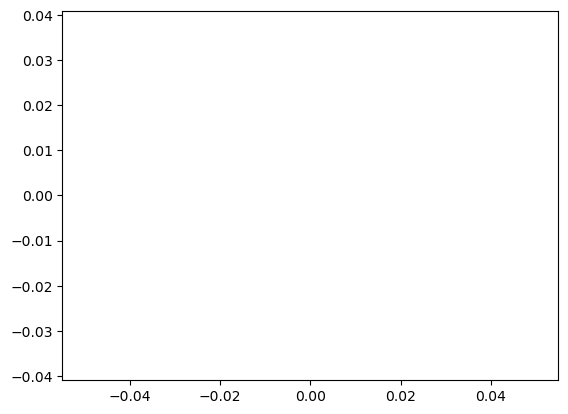

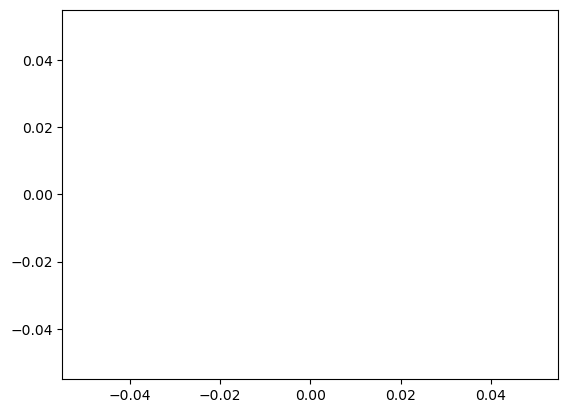

Failed 0
!! Failed 0 out of 0 for layout 0046_02758 !!
0282_03685
Earliest date: 2021-08-04 00:00:00, Latest date: 2021-08-24 23:00:00
Sampler built with 48240 ignition points.


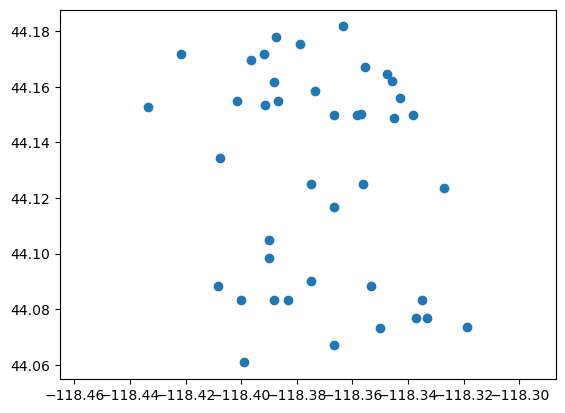

Scenario 0282_03518 has the wrong size for layout 0282_03685: 253 != 251 or 435 != 230


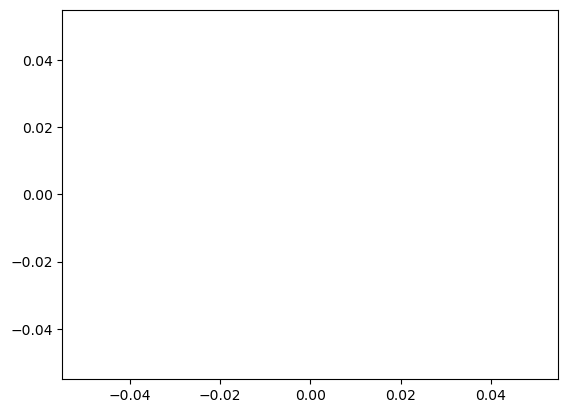

Failed 0
0346_02223
Earliest date: 2021-08-11 00:00:00, Latest date: 2021-09-12 23:00:00
Sampler built with 56517 ignition points.


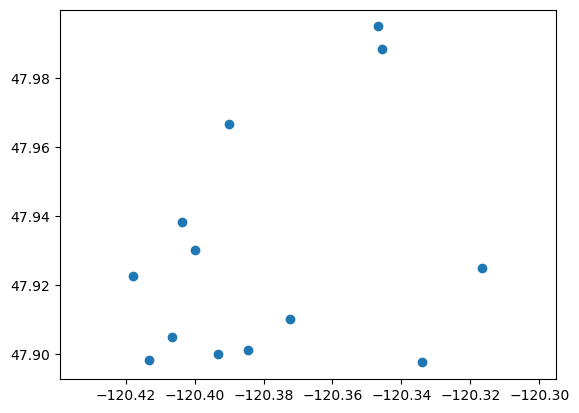

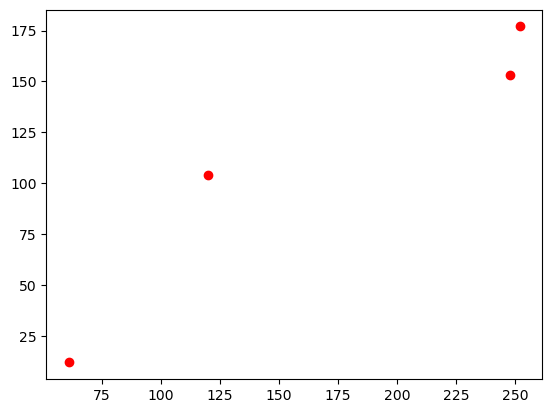

Failed 9
!! Failed 9 out of 13 for layout 0346_02223 !!
0321_03136
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-07-25 23:00:00
Sampler built with 48874 ignition points.


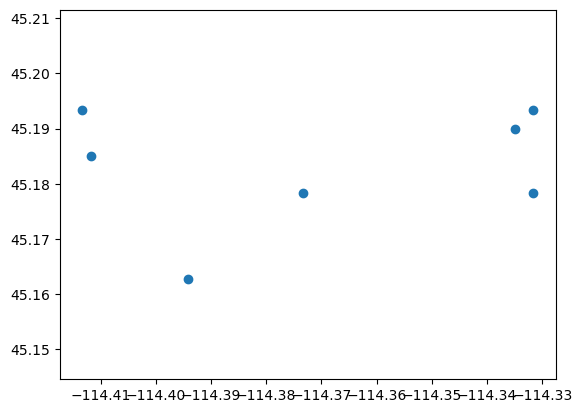

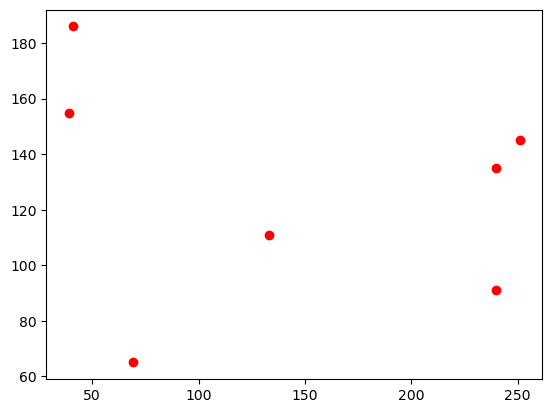

Failed 0
0314_02558
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-03 23:00:00
Sampler built with 36825 ignition points.


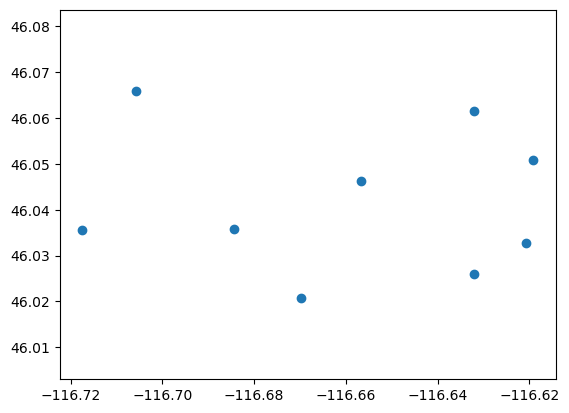

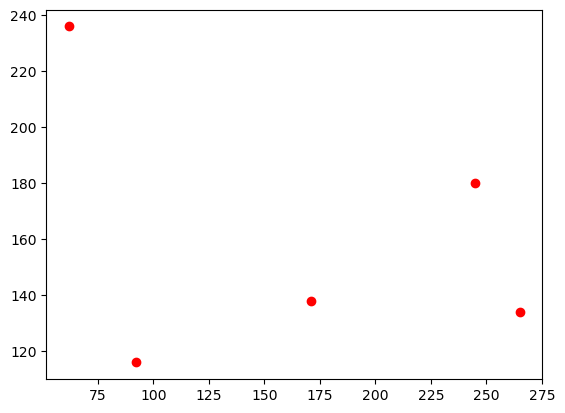

Failed 4
!! Failed 4 out of 9 for layout 0314_02558 !!
0269_00642
Earliest date: 2022-08-25 00:00:00, Latest date: 2022-09-15 23:00:00
Sampler built with 24051 ignition points.


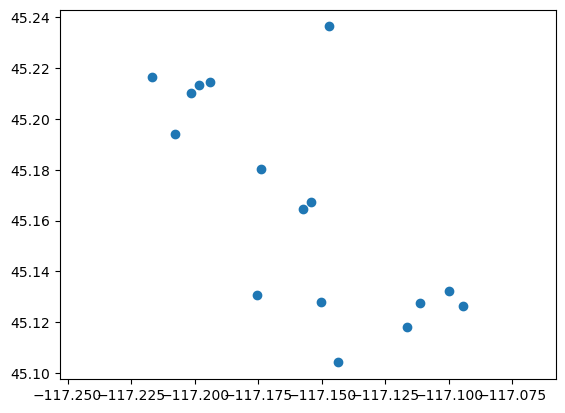

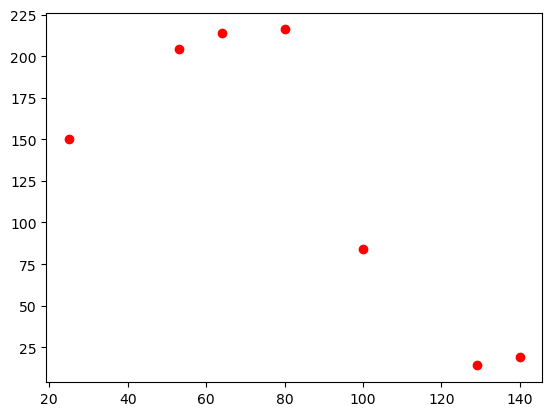

Failed 9
!! Failed 9 out of 16 for layout 0269_00642 !!
0056_01464
Earliest date: 2022-06-15 00:00:00, Latest date: 2022-07-04 23:00:00
Error processing 0056_00611: No JPG files found in folder: ./WideDataset/0056_01464/Satellite_Images_Mask/0056_00611/
Error processing 0056_00610: No JPG files found in folder: ./WideDataset/0056_01464/Satellite_Images_Mask/0056_00610/
Error processing 0056_00612: No JPG files found in folder: ./WideDataset/0056_01464/Satellite_Images_Mask/0056_00612/
Sampler built with 26011 ignition points.


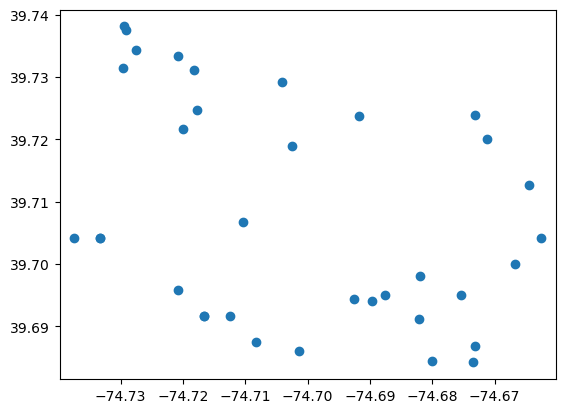

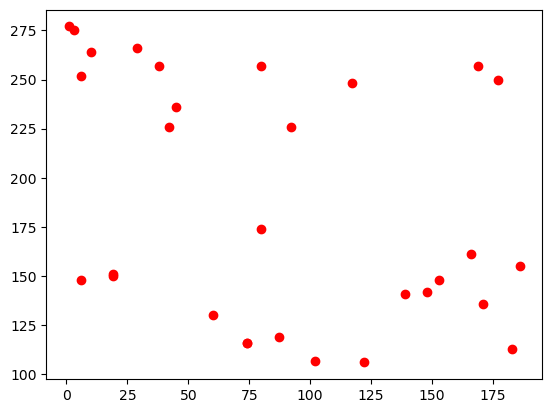

Failed 5
0347_00907
Earliest date: 2021-08-11 00:00:00, Latest date: 2021-09-12 23:00:00
Sampler built with 29230 ignition points.


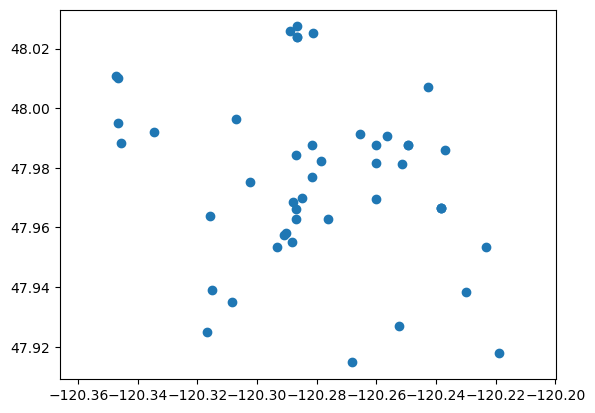

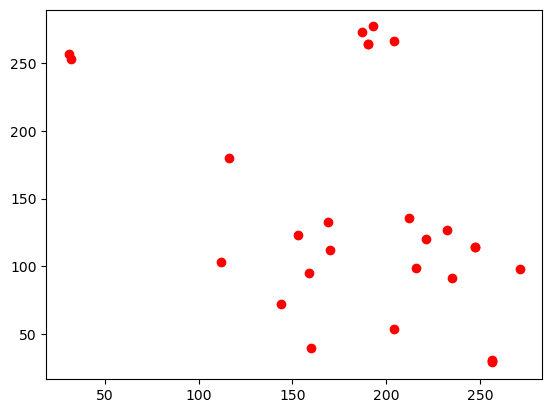

Failed 20
!! Failed 20 out of 47 for layout 0347_00907 !!
0001_02614
Earliest date: 2023-07-24 00:00:00, Latest date: 2023-08-10 23:00:00
Sampler built with 30055 ignition points.


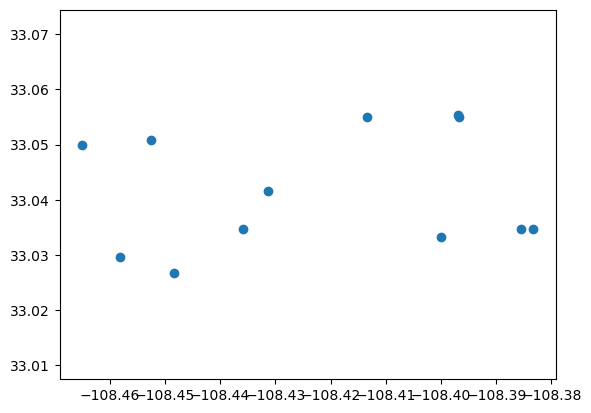

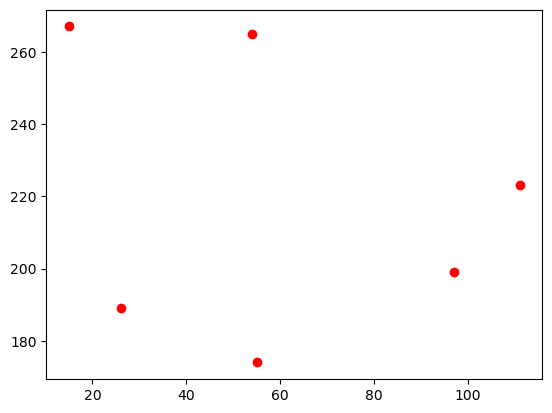

Failed 6
!! Failed 6 out of 12 for layout 0001_02614 !!
0274_03052
Earliest date: 2022-06-16 00:00:00, Latest date: 2022-07-08 23:00:00
Sampler built with 61551 ignition points.


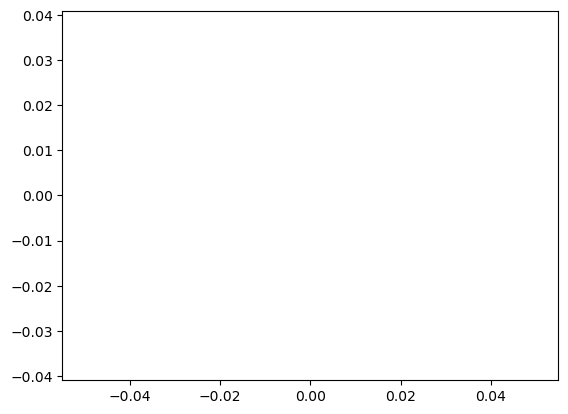

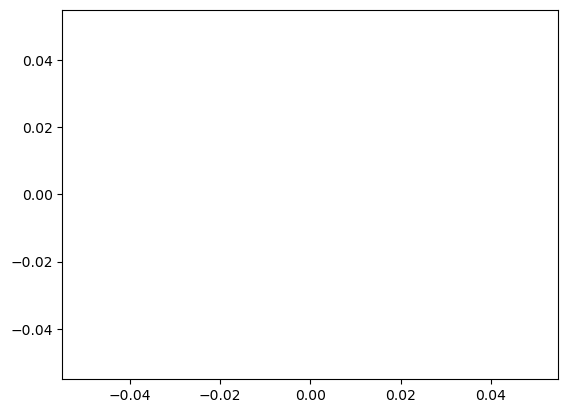

Failed 0
!! Failed 0 out of 0 for layout 0274_03052 !!
0276_03090
Earliest date: 2022-06-18 00:00:00, Latest date: 2022-07-08 23:00:00
Sampler built with 77168 ignition points.


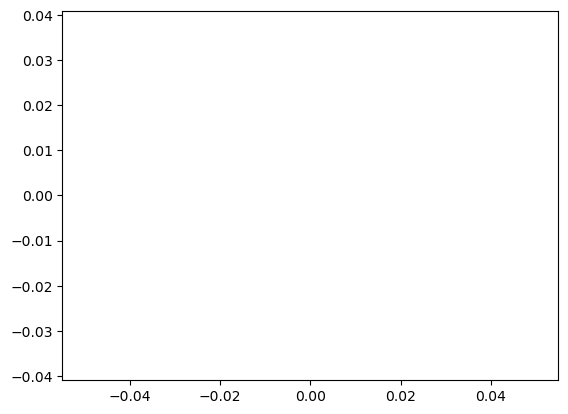

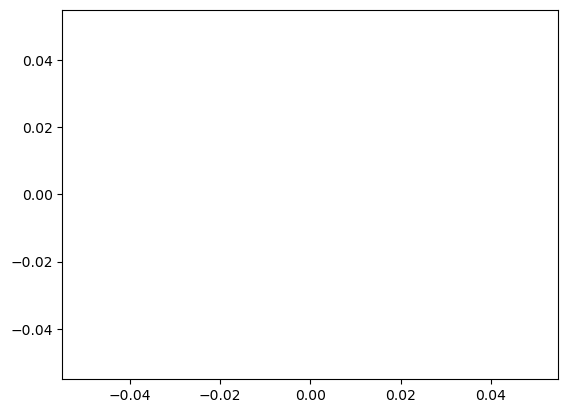

Failed 0
!! Failed 0 out of 0 for layout 0276_03090 !!
0018_02440
Earliest date: 2023-06-21 00:00:00, Latest date: 2023-07-13 23:00:00
Sampler built with 40686 ignition points.


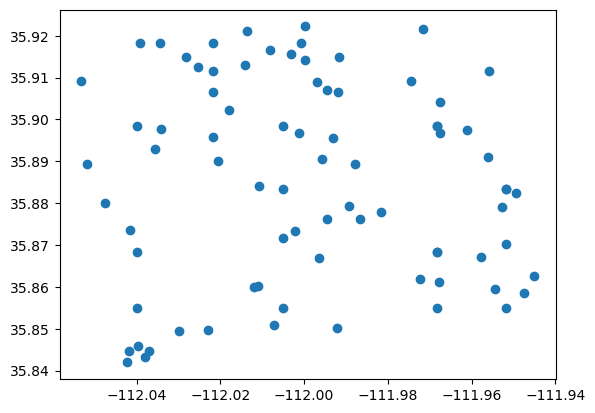

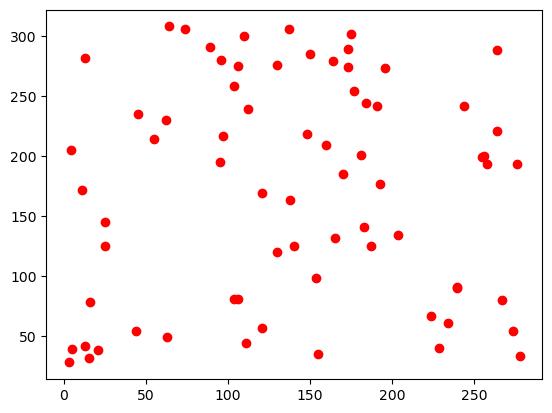

Failed 9
0017_02731
Earliest date: 2023-03-03 00:00:00, Latest date: 2023-03-21 23:00:00
Sampler built with 36565 ignition points.


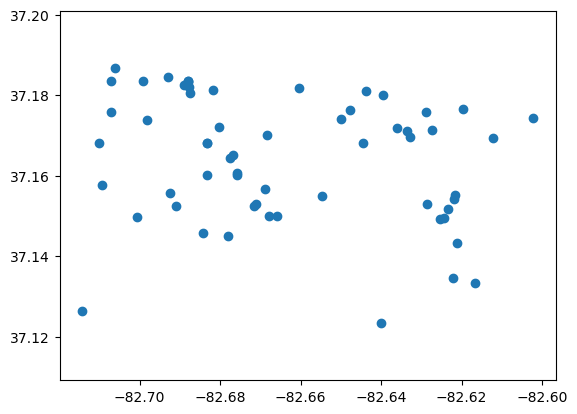

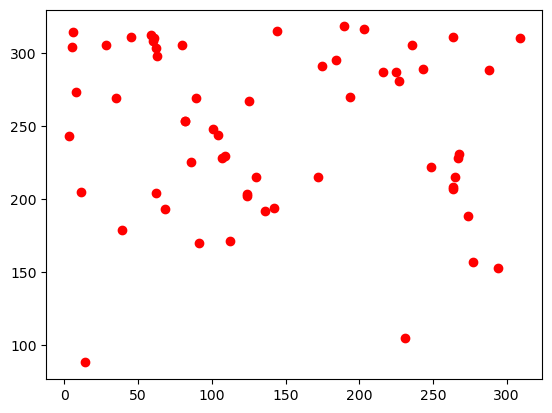

Failed 1
0055_02555
Earliest date: 2022-09-01 00:00:00, Latest date: 2022-09-20 23:00:00
Sampler built with 42089 ignition points.


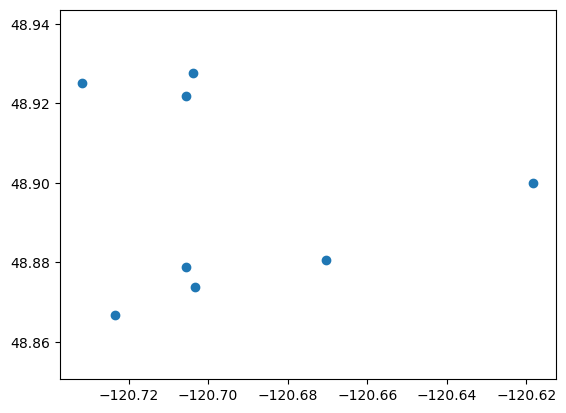

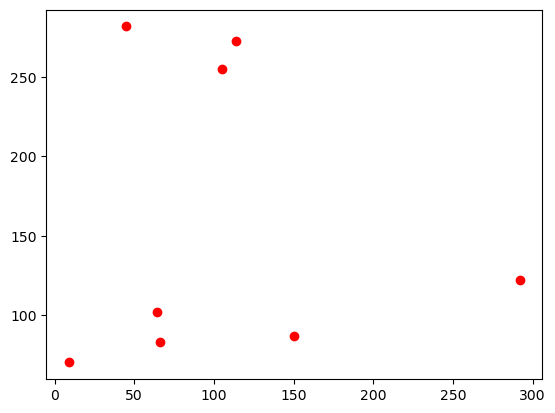

Failed 0
0319_04796
Earliest date: 2021-07-13 00:00:00, Latest date: 2021-08-01 23:00:00
Sampler built with 61731 ignition points.


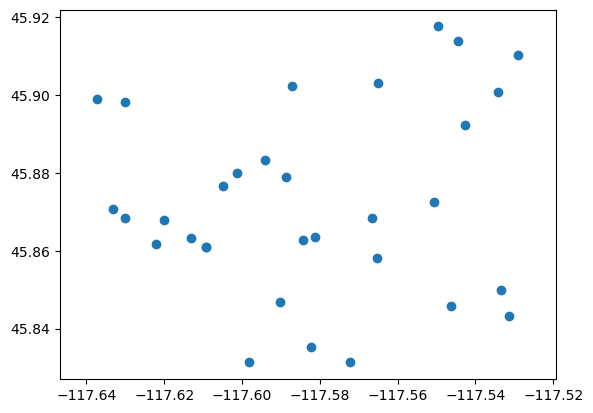

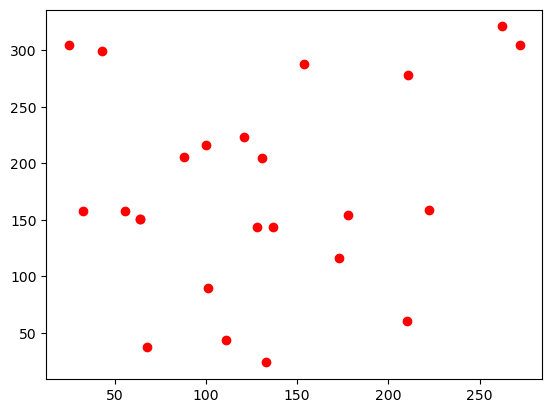

Failed 8
!! Failed 8 out of 32 for layout 0319_04796 !!
0266_03160
Earliest date: 2022-06-04 00:00:00, Latest date: 2022-06-22 23:00:00
Sampler built with 64492 ignition points.


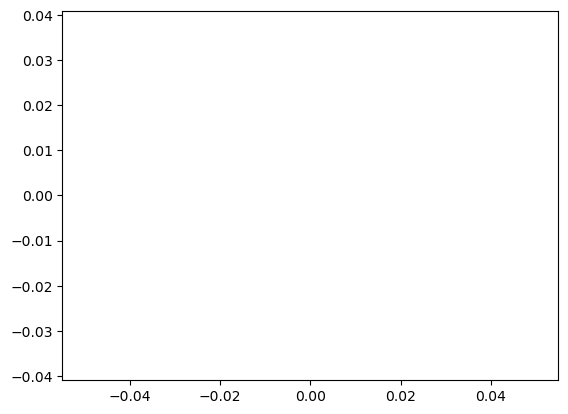

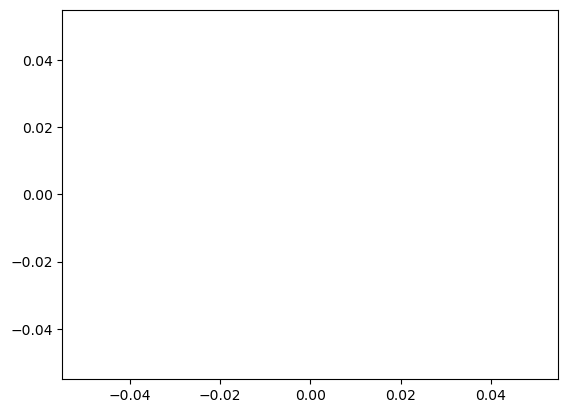

Failed 0
!! Failed 0 out of 0 for layout 0266_03160 !!
0085_02466
Earliest date: 2022-08-30 00:00:00, Latest date: 2022-09-20 23:00:00
Sampler built with 43475 ignition points.


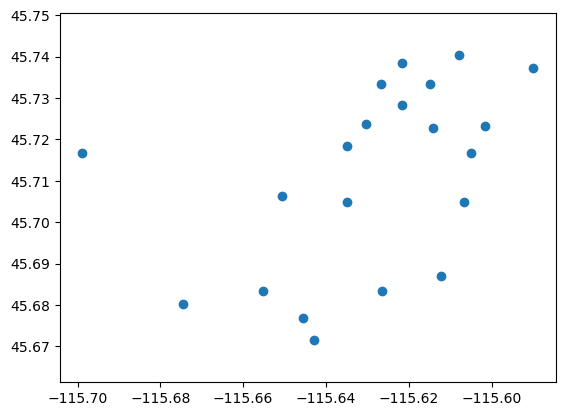

Scenario 0085_01420 has the wrong size for layout 0085_02466: 334 != 351 or 241 != 250


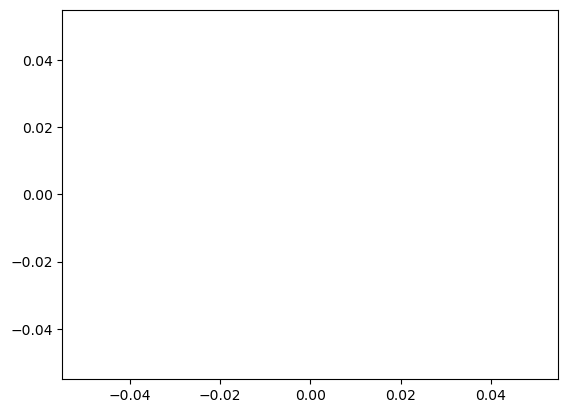

Failed 0
0320_02378
Earliest date: 2021-07-13 00:00:00, Latest date: 2021-08-01 23:00:00
Sampler built with 42267 ignition points.


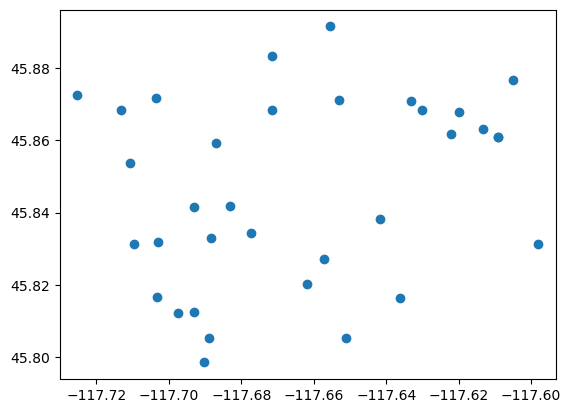

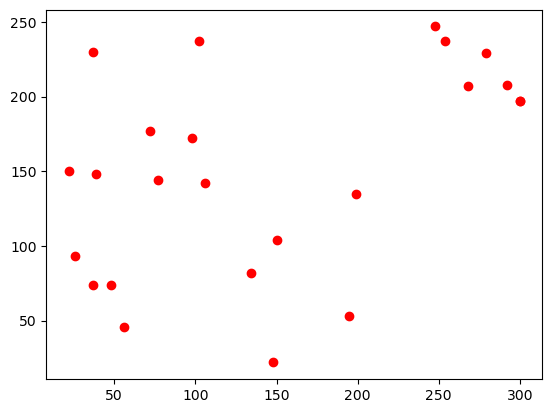

Failed 10
!! Failed 10 out of 34 for layout 0320_02378 !!
0005_00725
Earliest date: 2023-03-04 00:00:00, Latest date: 2023-03-21 23:00:00
Sampler built with 23957 ignition points.


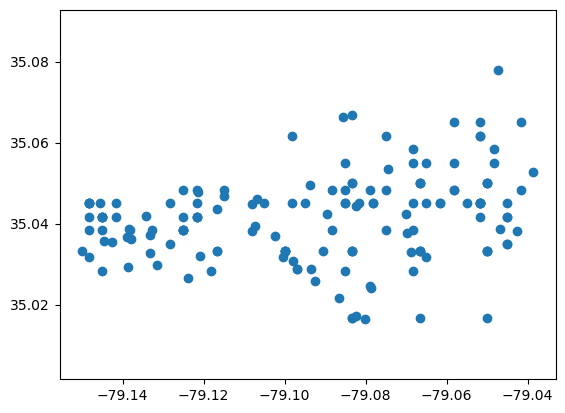

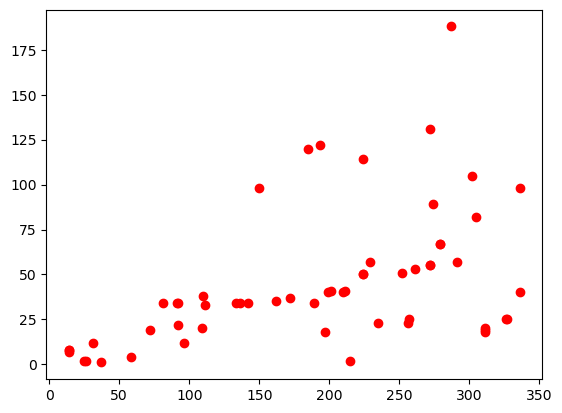

Failed 99
!! Failed 99 out of 157 for layout 0005_00725 !!
0334_02747
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 70542 ignition points.


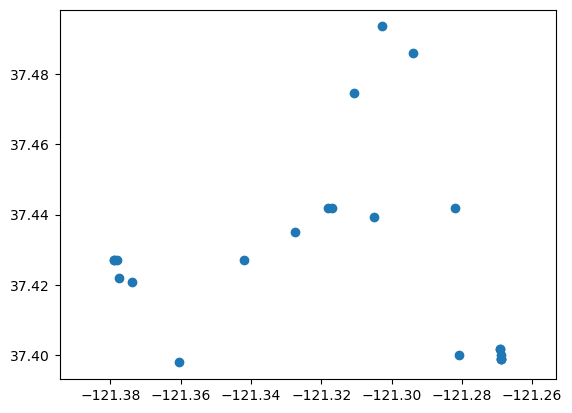

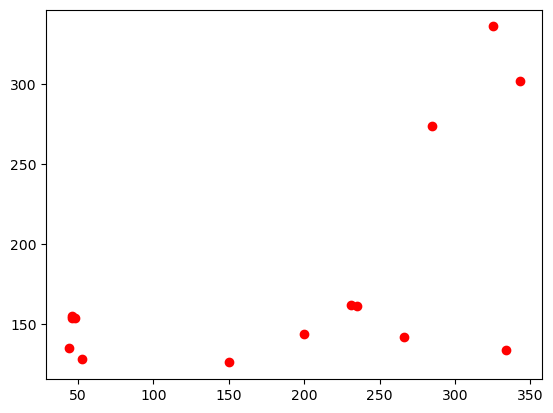

Failed 8
!! Failed 8 out of 22 for layout 0334_02747 !!
0039_01770
Earliest date: 2023-09-18 00:00:00, Latest date: 2023-10-17 23:00:00
Sampler built with 33797 ignition points.


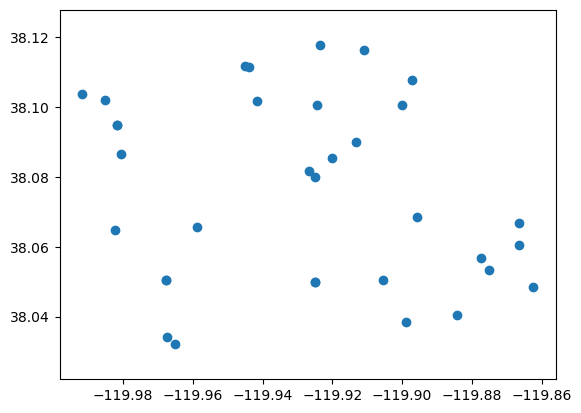

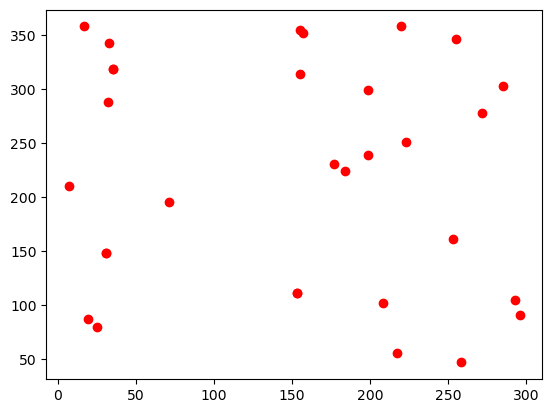

Failed 3
0035_00642
Earliest date: 2022-05-01 00:00:00, Latest date: 2022-05-24 23:00:00
Sampler built with 26639 ignition points.


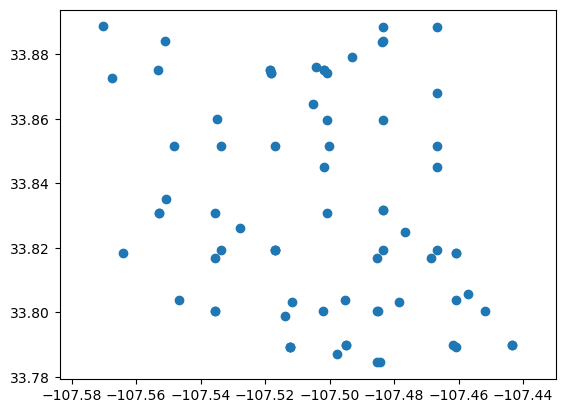

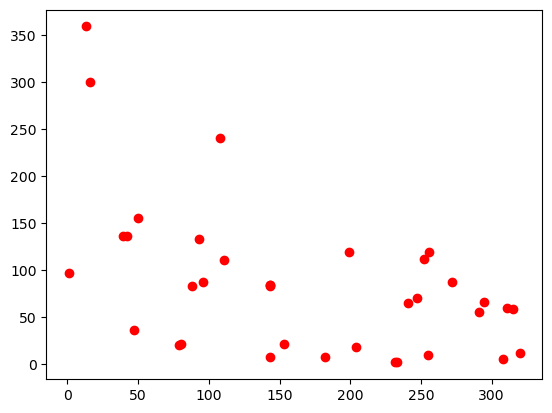

Failed 39
!! Failed 39 out of 75 for layout 0035_00642 !!
0313_03217
Layout ./WideDataset/0313_03217/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0313_03217/Satellite_Image_Mask/ does not exist
0343_03272
Earliest date: 2021-08-03 00:00:00, Latest date: 2021-08-29 23:00:00
Sampler built with 42809 ignition points.


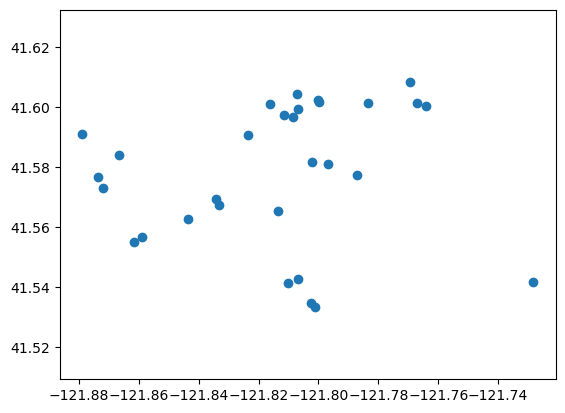

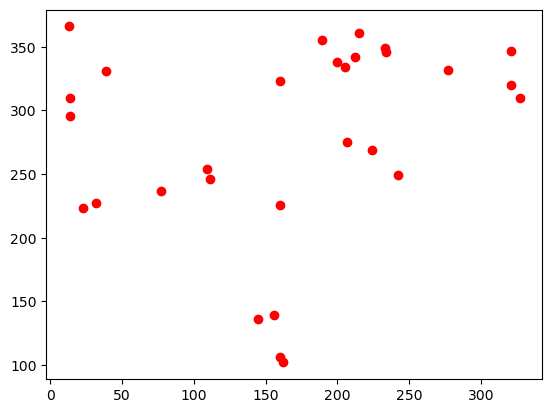

Failed 1
0341_02643
Earliest date: 2021-08-03 00:00:00, Latest date: 2021-08-29 23:00:00
Sampler built with 46680 ignition points.


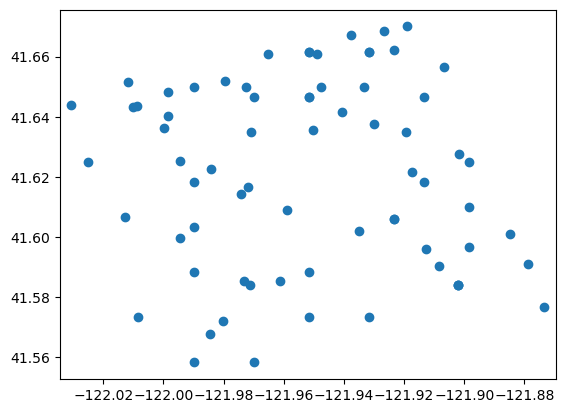

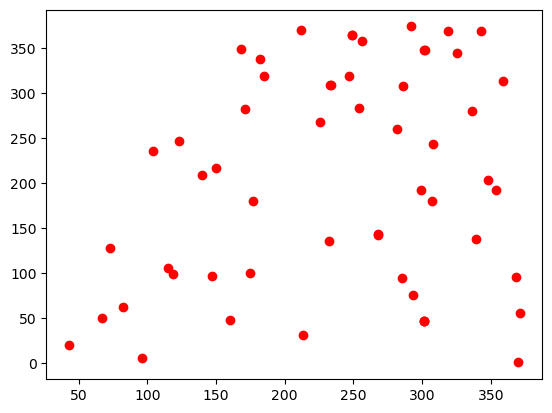

Failed 15
!! Failed 15 out of 71 for layout 0341_02643 !!
0317_01620
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-03 23:00:00
Error processing 0317_00210: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_00210/
Error processing 0317_00211: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_00211/
Error processing 0317_01506: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_01506/
Error processing 0317_00212: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_00212/
Error processing 0317_01507: No JPG files found in folder: ./WideDataset/0317_01620/Satellite_Images_Mask/0317_01507/
Sampler built with 43236 ignition points.


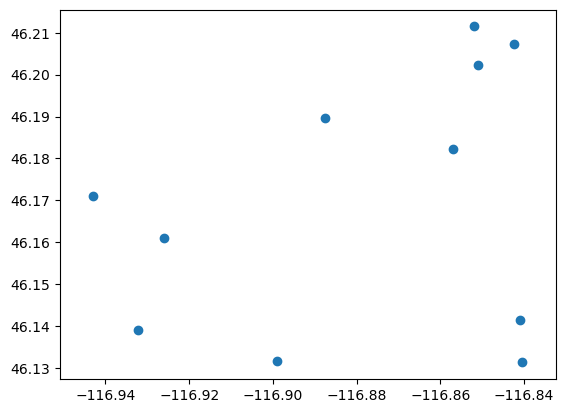

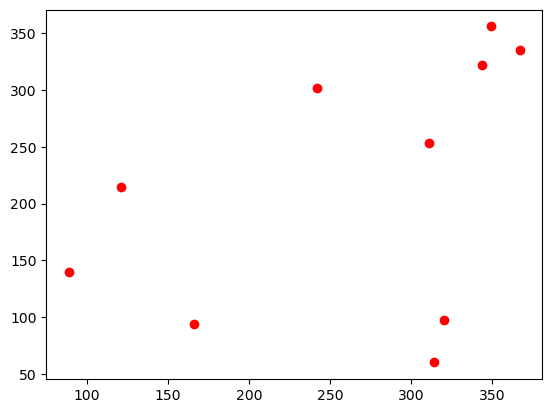

Failed 1
0312_02933
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-03 23:00:00
Error processing 0312_02522: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_02522/
Error processing 0312_02523: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_02523/
Error processing 0312_00072: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_00072/
Error processing 0312_02521: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_02521/
Error processing 0312_00074: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_00074/
Error processing 0312_00073: No JPG files found in folder: ./WideDataset/0312_02933/Satellite_Images_Mask/0312_00073/
Sampler built with 68856 ignition points.


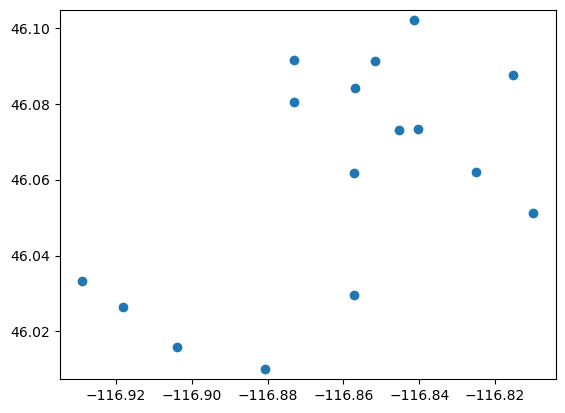

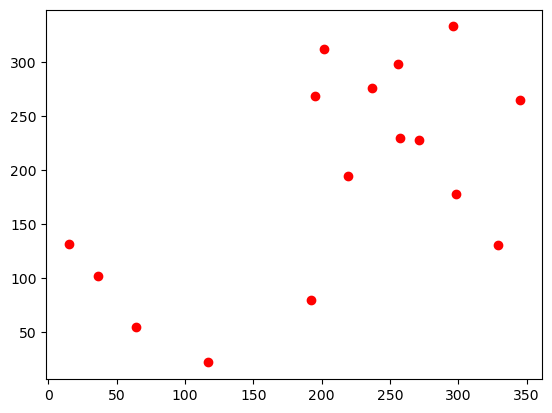

Failed 0
0323_01406
Earliest date: 2022-08-07 00:00:00, Latest date: 2022-08-30 23:00:00
Sampler built with 47469 ignition points.


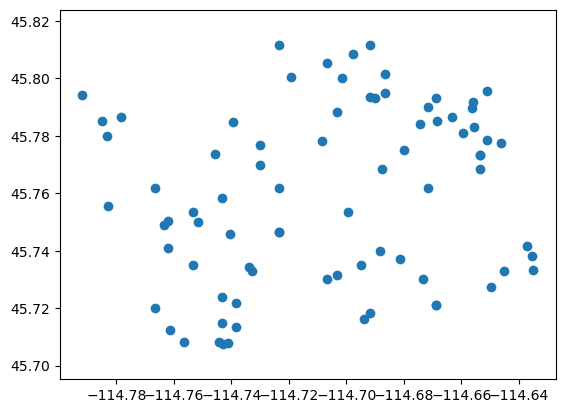

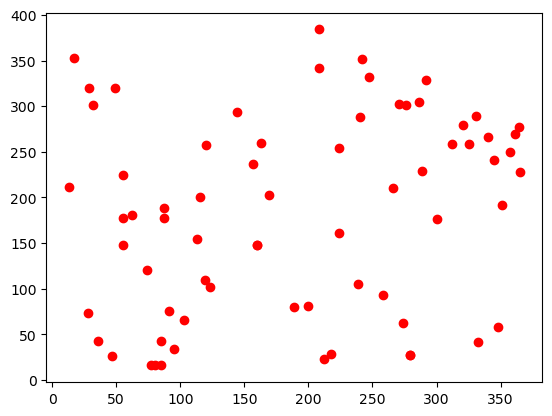

Failed 10
0345_03074
Earliest date: 2022-09-01 00:00:00, Latest date: 2022-09-22 23:00:00
Sampler built with 79318 ignition points.


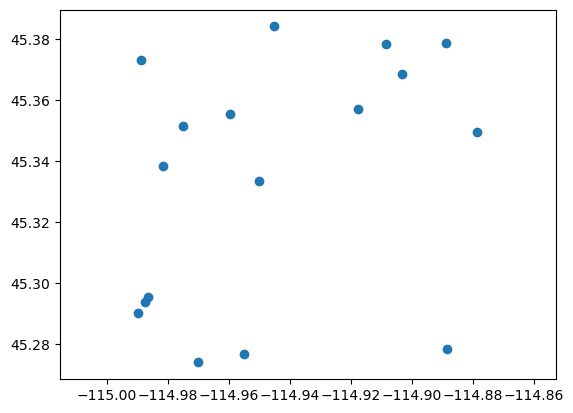

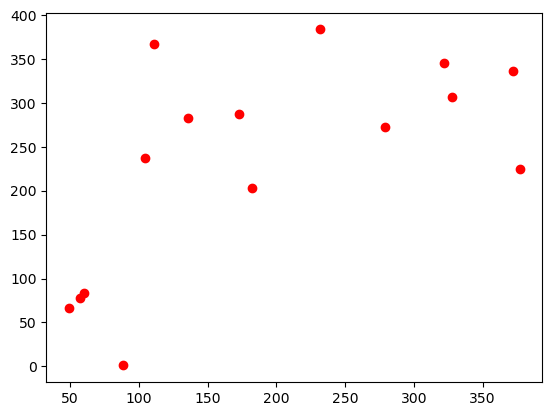

Failed 2
0271_03136
Earliest date: 2022-06-04 00:00:00, Latest date: 2022-06-22 23:00:00
Sampler built with 69116 ignition points.


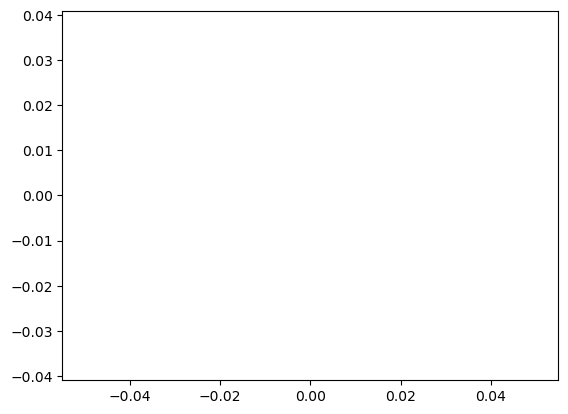

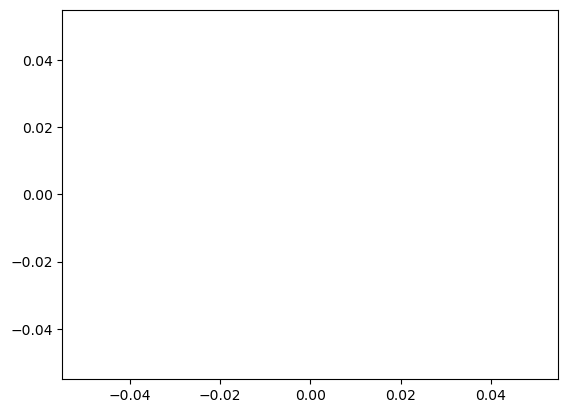

Failed 0
!! Failed 0 out of 0 for layout 0271_03136 !!
0342_02222
Earliest date: 2021-08-03 00:00:00, Latest date: 2021-08-29 23:00:00
Sampler built with 41269 ignition points.


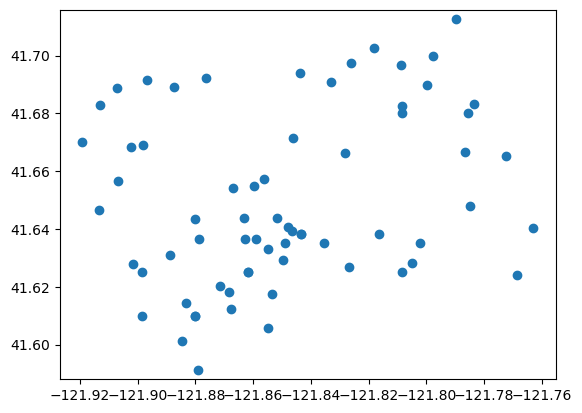

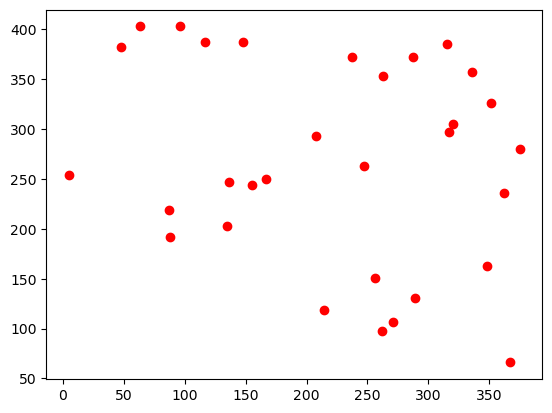

Failed 36
!! Failed 36 out of 67 for layout 0342_02222 !!
0264_02426
Earliest date: 2020-08-26 00:00:00, Latest date: 2020-09-25 23:00:00
Sampler built with 49904 ignition points.


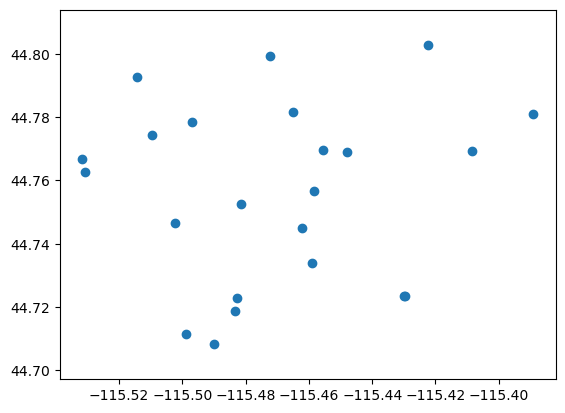

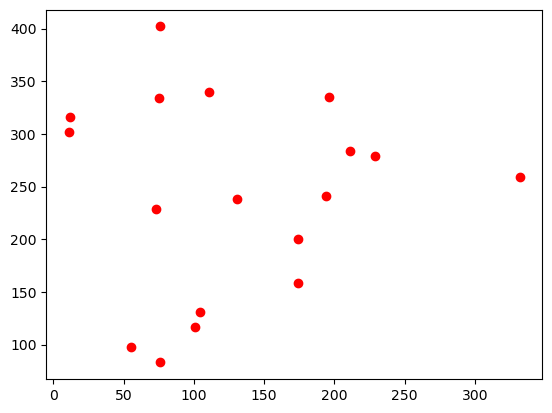

Failed 5
!! Failed 5 out of 23 for layout 0264_02426 !!
0327_03305
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 64705 ignition points.


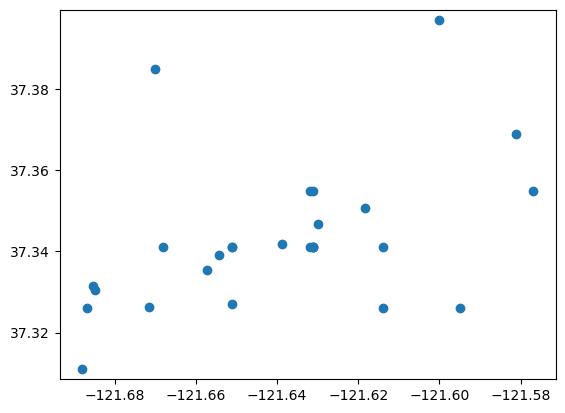

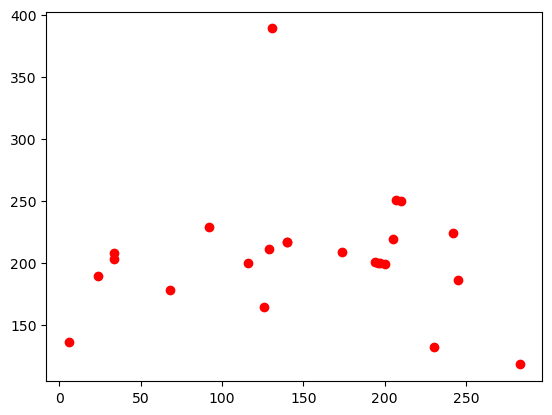

Failed 3
0278_01323
Earliest date: 2023-07-22 00:00:00, Latest date: 2023-08-24 23:00:00
Sampler built with 22606 ignition points.


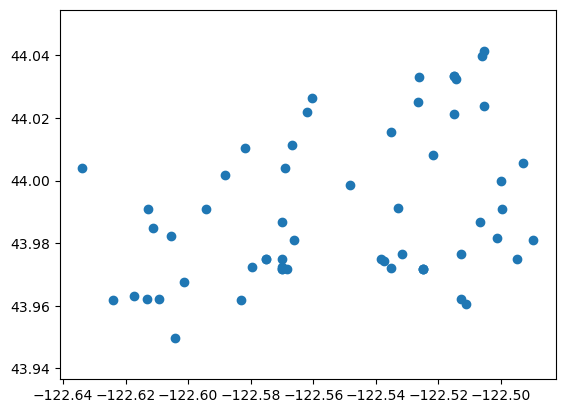

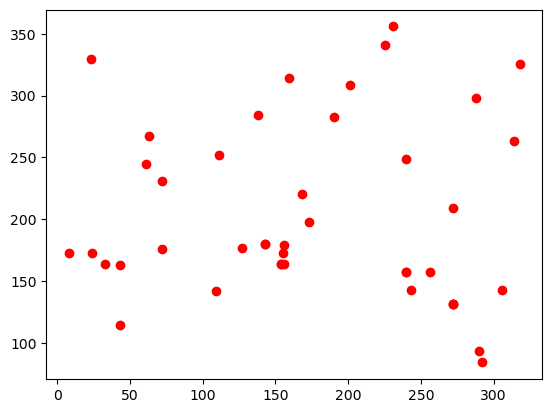

Failed 15
!! Failed 15 out of 58 for layout 0278_01323 !!
0052_00798
Earliest date: 2022-12-25 00:00:00, Latest date: 2023-01-31 23:00:00
Sampler built with 12214 ignition points.


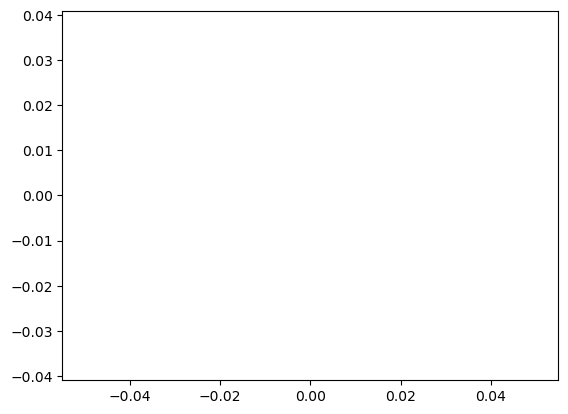

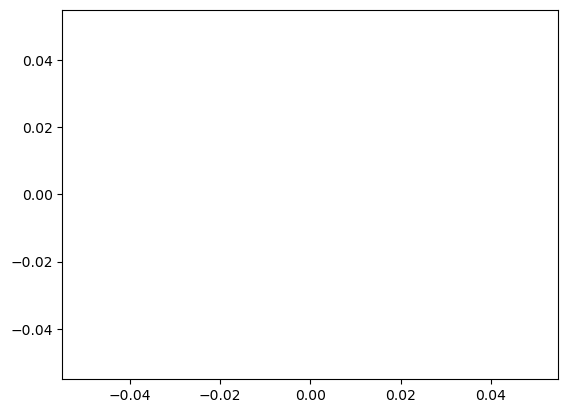

Failed 0
!! Failed 0 out of 0 for layout 0052_00798 !!
0315_02455
Layout ./WideDataset/0315_02455/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0315_02455/Satellite_Image_Mask/ does not exist
0265_02487
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 53188 ignition points.


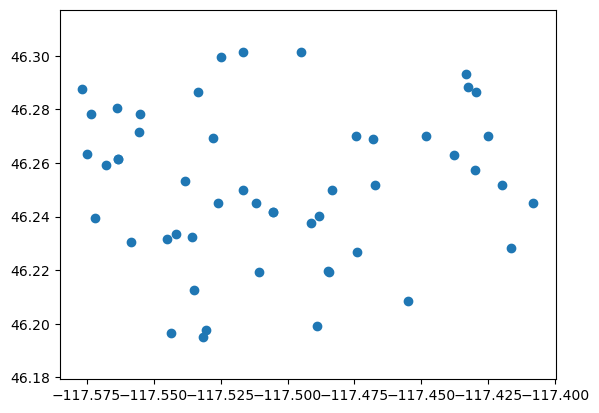

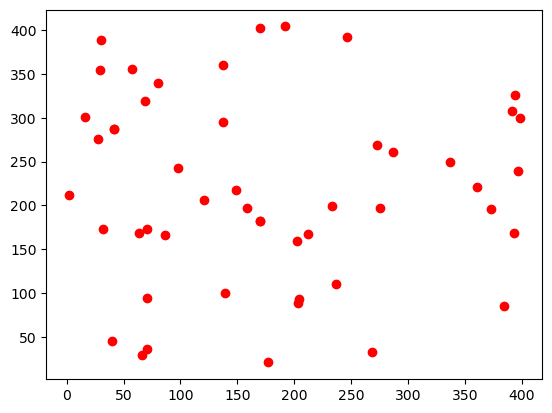

Failed 1
0277_02102
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 55307 ignition points.


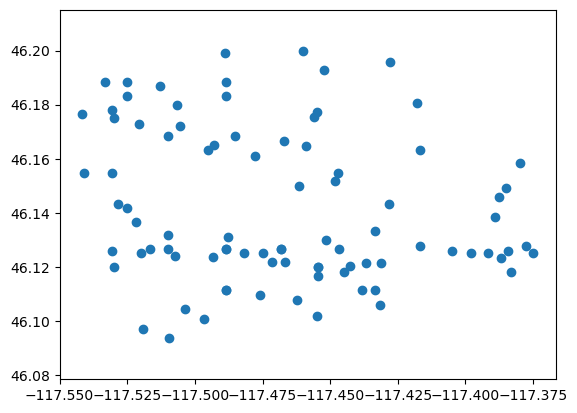

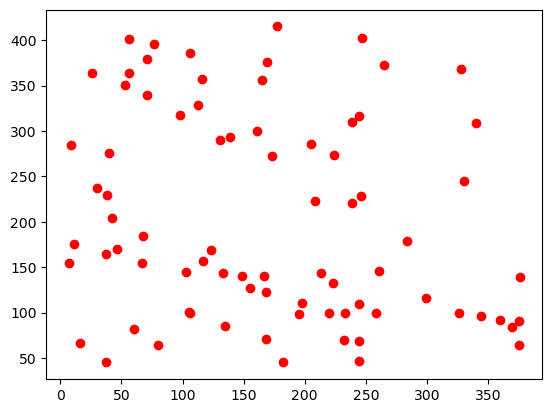

Failed 9
0110_02767
Layout ./WideDataset/0110_02767/Satellite_Images_Mask/ does not exist
Error for layout 0110_02767: unconverted data remains:  
0054_01387
Earliest date: 2023-08-14 00:00:00, Latest date: 2023-09-25 23:00:00
Sampler built with 42403 ignition points.


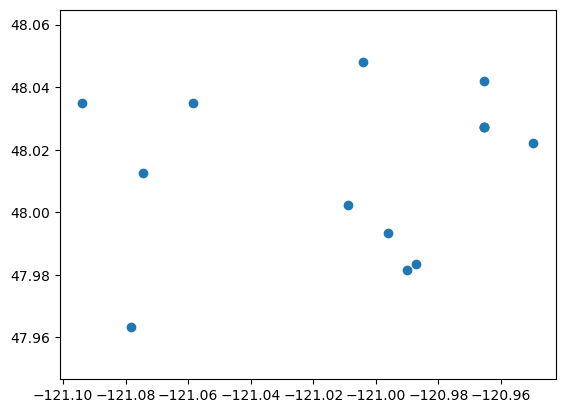

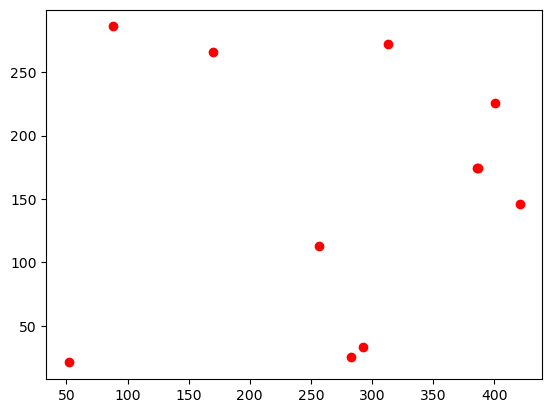

Failed 3
!! Failed 3 out of 14 for layout 0054_01387 !!
0086_02230
Earliest date: 2020-08-29 00:00:00, Latest date: 2020-09-16 23:00:00
Sampler built with 37041 ignition points.


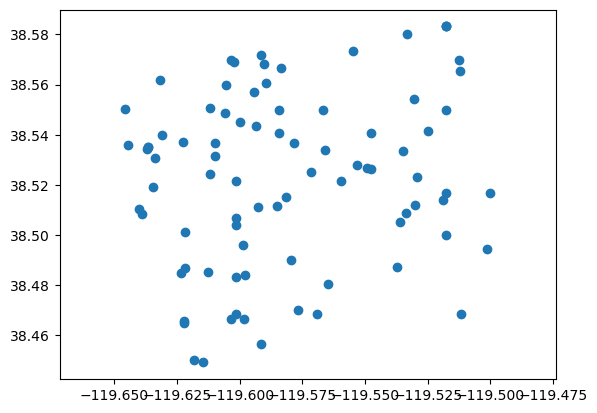

Scenario 0086_00265 has the wrong size for layout 0086_02230: 429 != 263 or 445 != 309


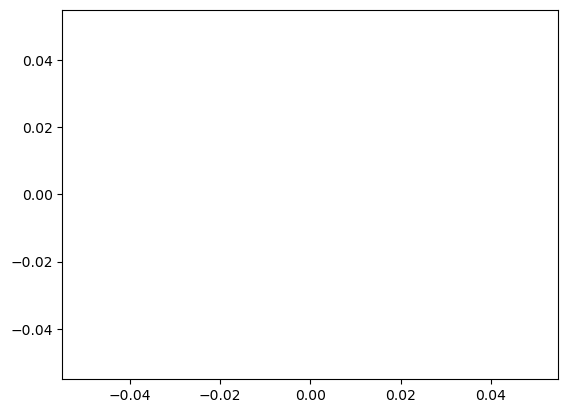

Failed 0
0087_02445
Earliest date: 2020-08-29 00:00:00, Latest date: 2020-09-16 23:00:00
Sampler built with 44877 ignition points.


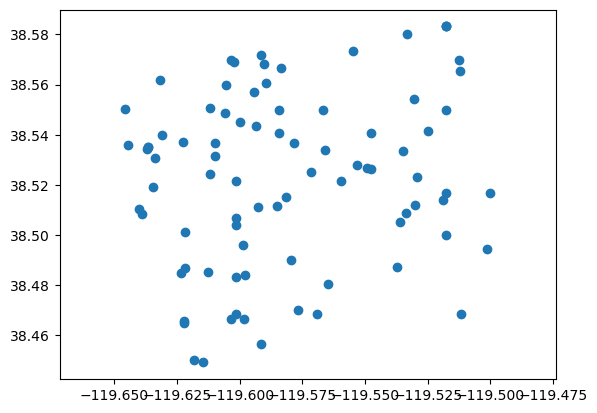

Scenario 0021_00115 has the wrong size for layout 0087_02445: 429 != 267 or 445 != 285


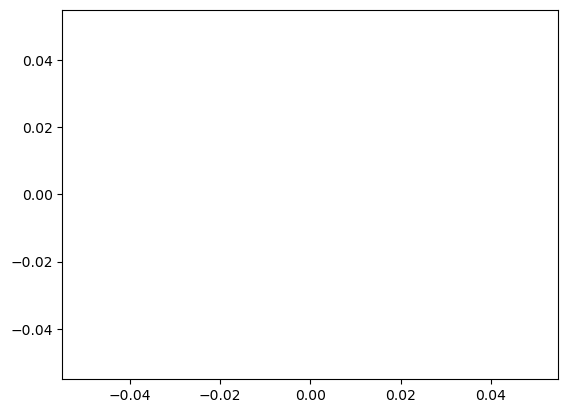

Failed 0
0003_01715
Earliest date: 2023-05-17 00:00:00, Latest date: 2023-06-09 23:00:00
Sampler built with 27043 ignition points.


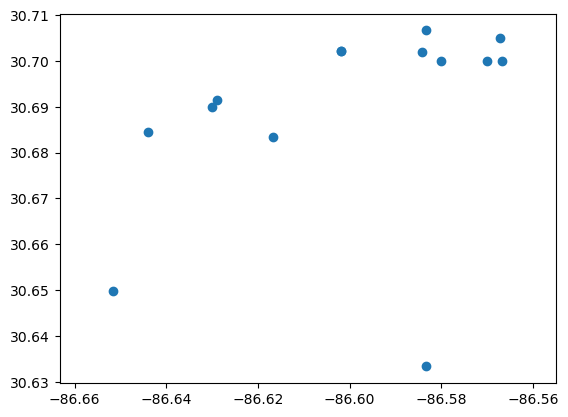

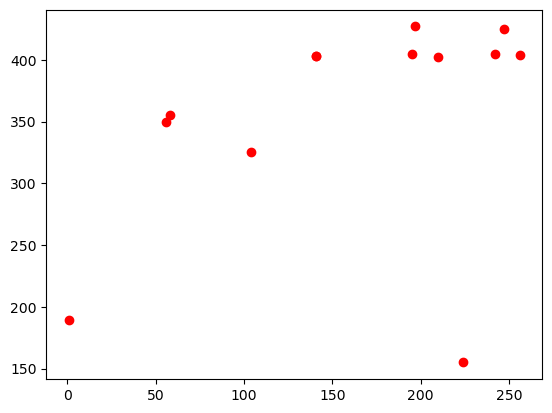

Failed 1
0109_03065
Layout ./WideDataset/0109_03065/Satellite_Images_Mask/ does not exist
Error for layout 0109_03065: unconverted data remains:  
0088_01340
Earliest date: 2021-08-09 00:00:00, Latest date: 2021-09-02 23:00:00
Sampler built with 36823 ignition points.


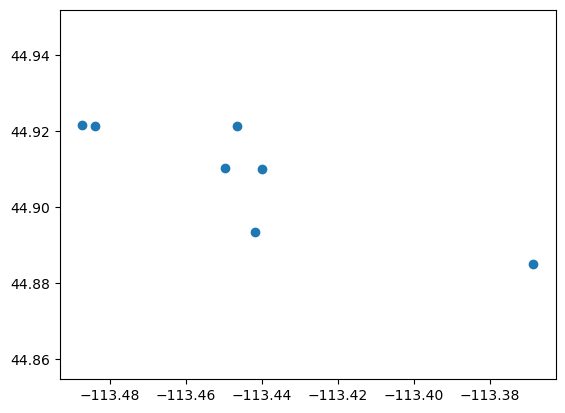

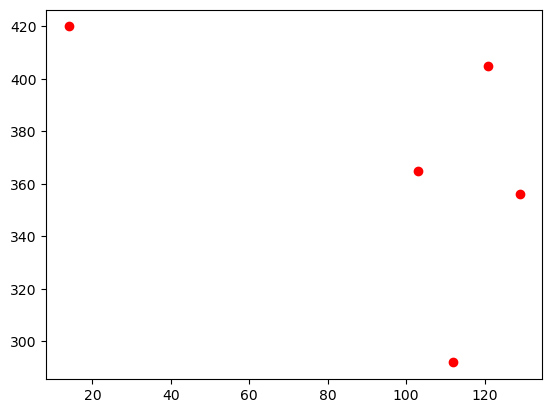

Failed 2
!! Failed 2 out of 7 for layout 0088_01340 !!
0045_02388
Earliest date: 2023-08-24 00:00:00, Latest date: 2023-09-11 23:00:00
Error processing 0045_00685: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_00685/
Error processing 0045_00684: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_00684/
Error processing 0045_01590: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_01590/
Error processing 0045_02040: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_02040/
Error processing 0045_02012: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_02012/
Error processing 0045_02041: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_02041/
Error processing 0045_00686: No JPG files found in folder: ./WideDataset/0045_02388/Satellite_Images_Mask/0045_00686/
Error processing 0045_01589: No JPG fil

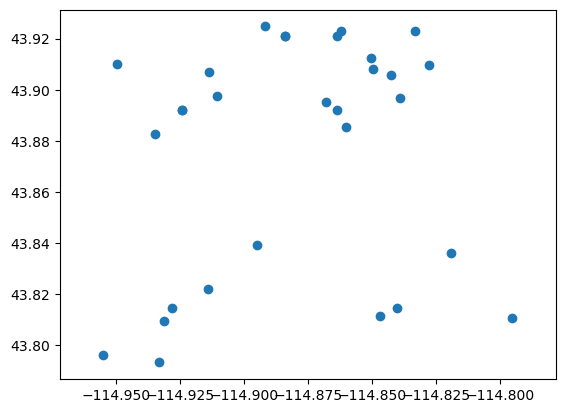

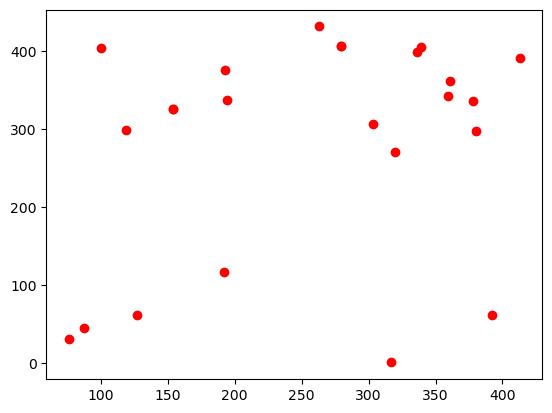

Failed 6
0335_01696
Earliest date: 2021-07-12 00:00:00, Latest date: 2021-08-04 23:00:00
Sampler built with 46222 ignition points.


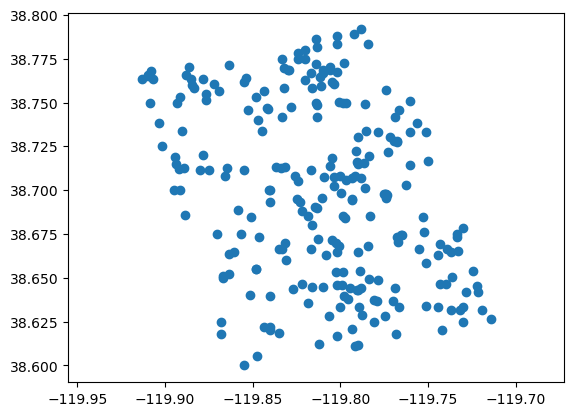

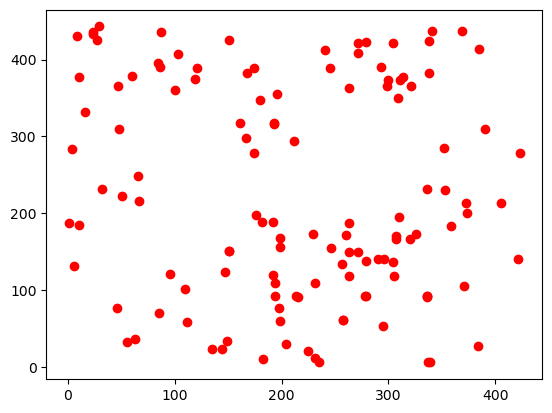

Failed 121
!! Failed 121 out of 247 for layout 0335_01696 !!
0338_02320
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 53466 ignition points.


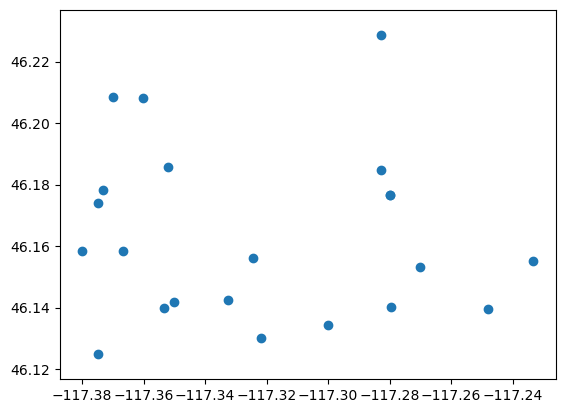

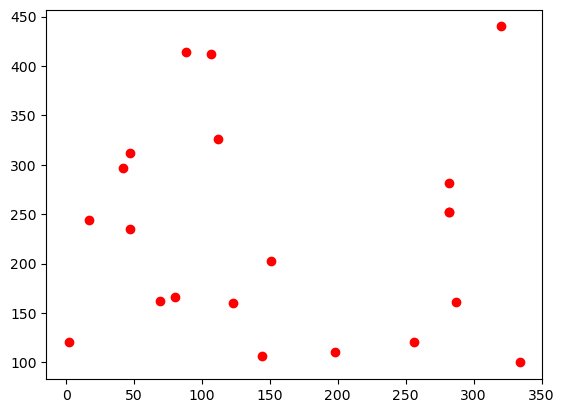

Failed 1
0337_02831
Earliest date: 2021-07-06 00:00:00, Latest date: 2021-07-23 23:00:00
Sampler built with 73419 ignition points.


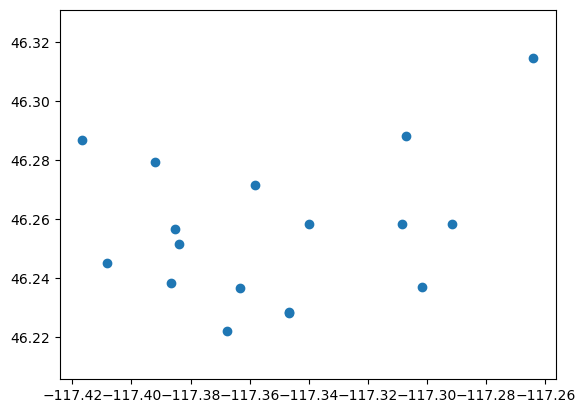

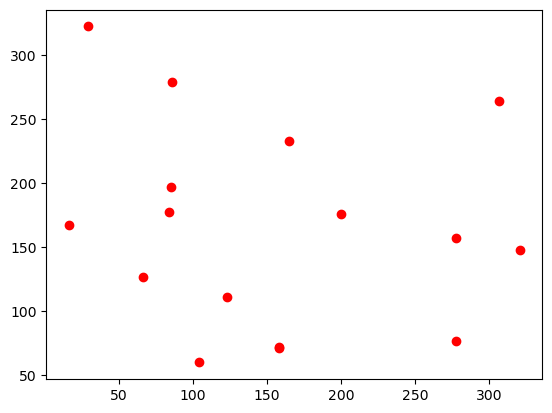

Failed 1
0316_02459
Layout ./WideDataset/0316_02459/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0316_02459/Satellite_Image_Mask/ does not exist
0333_03036
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 77405 ignition points.


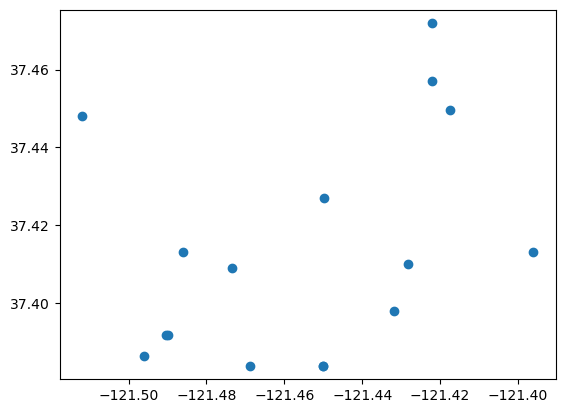

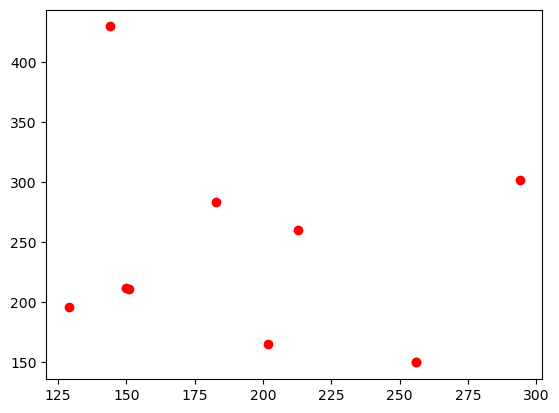

Failed 6
!! Failed 6 out of 16 for layout 0333_03036 !!
0332_03255
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 70859 ignition points.


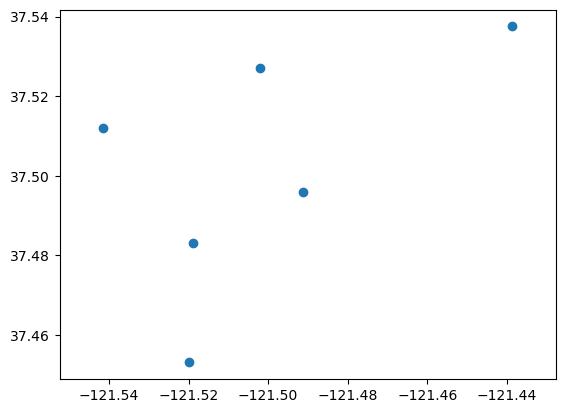

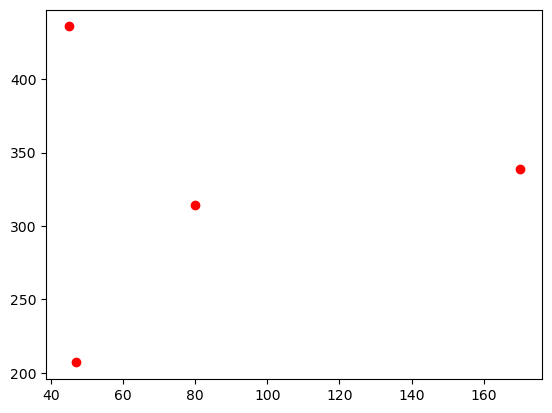

Failed 2
!! Failed 2 out of 6 for layout 0332_03255 !!
0108_02258
Layout ./WideDataset/0108_02258/Satellite_Images_Mask/ does not exist
Error for layout 0108_02258: unconverted data remains:  5
0325_03049
Earliest date: 2020-08-12 00:00:00, Latest date: 2020-09-05 23:00:00
Sampler built with 59090 ignition points.


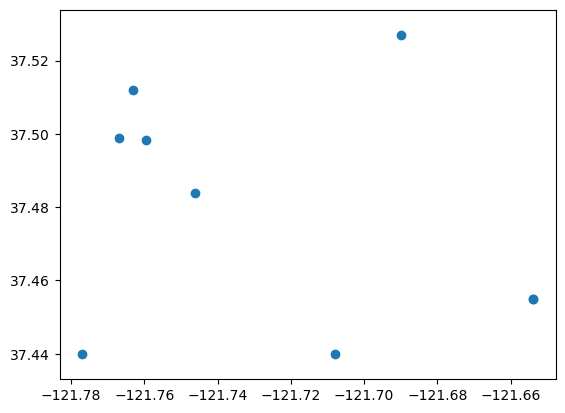

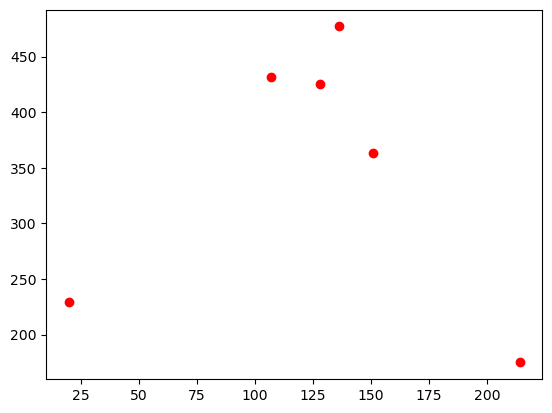

Failed 3
!! Failed 3 out of 9 for layout 0325_03049 !!
0025_02019
Earliest date: 2022-04-01 00:00:00, Latest date: 2022-04-18 23:00:00
Sampler built with 167567 ignition points.


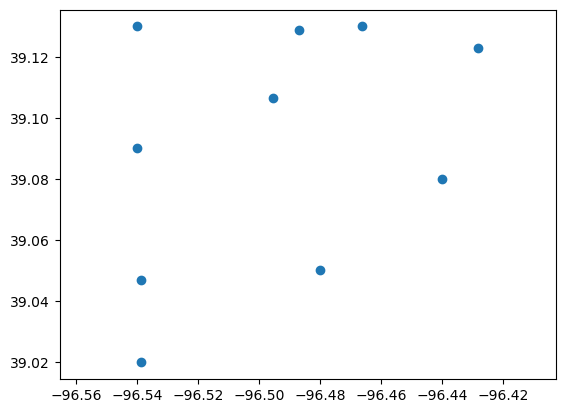

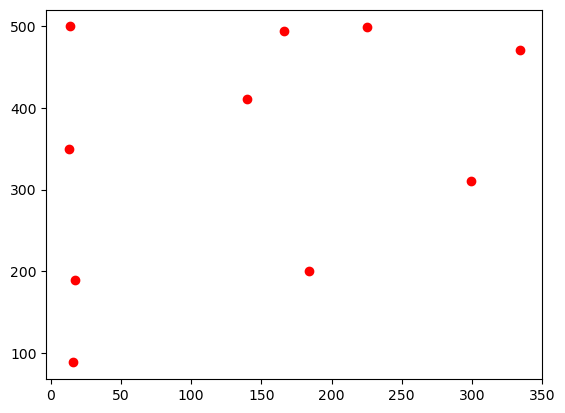

Failed 0
0344_03155
Earliest date: 2022-06-17 00:00:00, Latest date: 2022-07-10 23:00:00
Sampler built with 55900 ignition points.


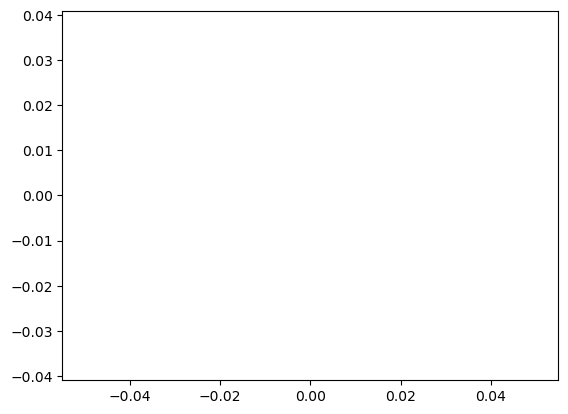

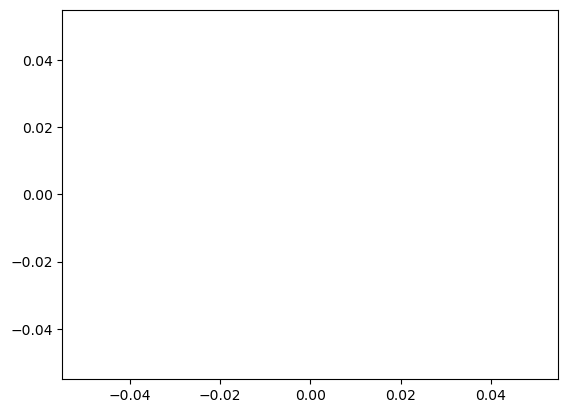

Failed 0
!! Failed 0 out of 0 for layout 0344_03155 !!
0024_02655
Earliest date: 2022-04-03 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 207530 ignition points.


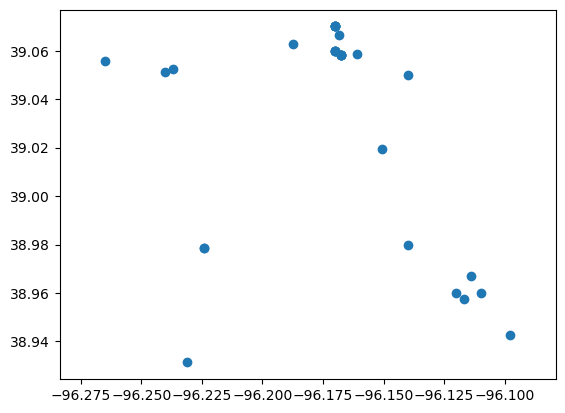

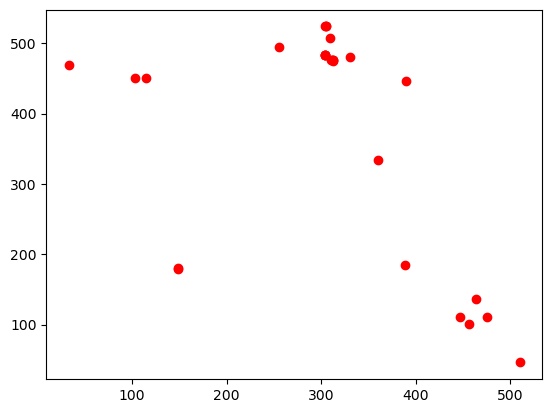

Failed 3
0106_02165
Layout ./WideDataset/0106_02165/Satellite_Images_Mask/ does not exist
Error for layout 0106_02165: unconverted data remains:  
0092_03189
Earliest date: 2020-08-09 00:00:00, Latest date: 2020-08-29 23:00:00
Sampler built with 72368 ignition points.


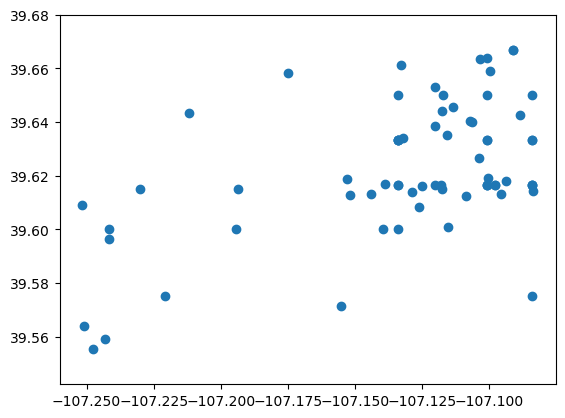

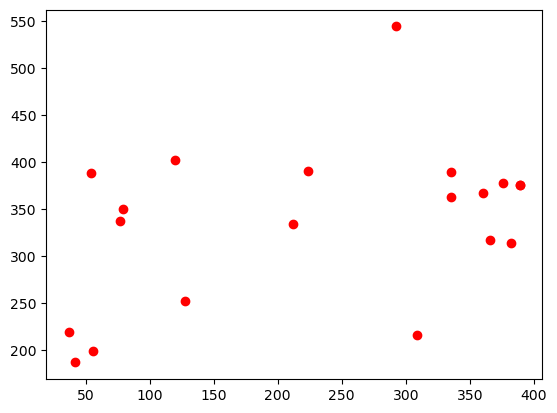

Failed 50
!! Failed 50 out of 70 for layout 0092_03189 !!
0111_03612
Layout ./WideDataset/0111_03612/Satellite_Images_Mask/ does not exist
Error for layout 0111_03612: unconverted data remains:  5
0023_00995
Earliest date: 2023-09-30 00:00:00, Latest date: 2023-10-25 23:00:00
Sampler built with 79841 ignition points.


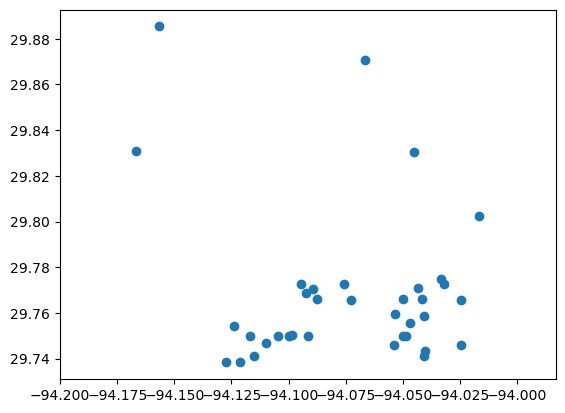

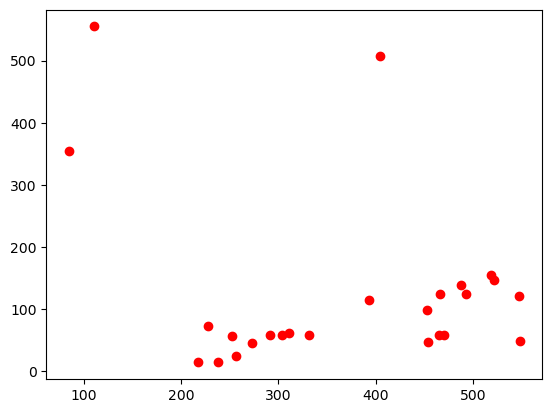

Failed 11
!! Failed 11 out of 36 for layout 0023_00995 !!
0089_00984
Earliest date: 2020-08-14 00:00:00, Latest date: 2020-09-01 23:00:00
Sampler built with 22261 ignition points.


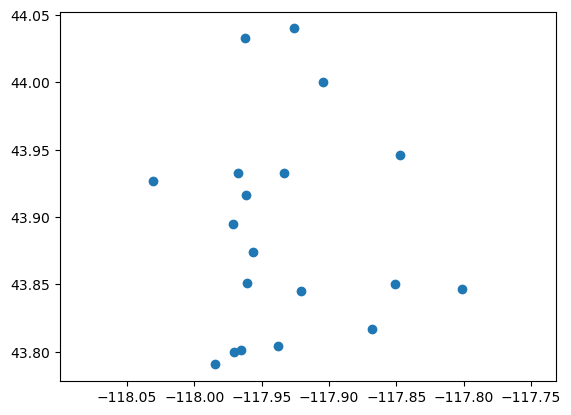

Scenario 0089_00777 has the wrong size for layout 0089_00984: 583 != 559 or 931 != 479


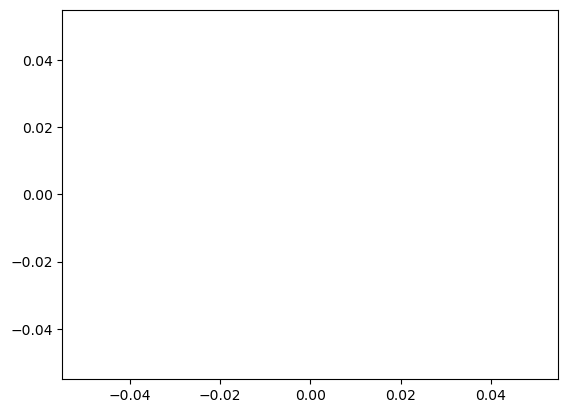

Failed 0
0104_02422
Layout ./WideDataset/0104_02422/Satellite_Images_Mask/ does not exist
Error for layout 0104_02422: unconverted data remains:  
0041_02386
Earliest date: 2023-08-22 00:00:00, Latest date: 2023-09-11 23:00:00
Sampler built with 30010 ignition points.


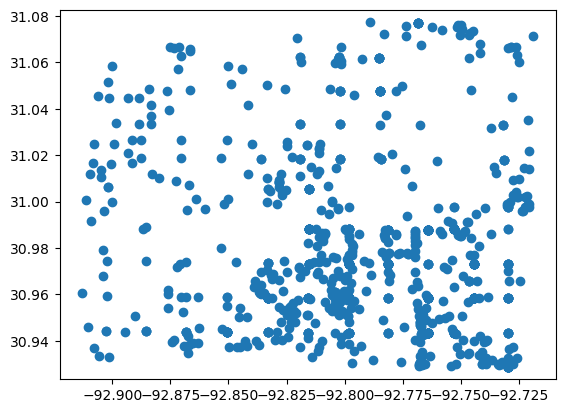

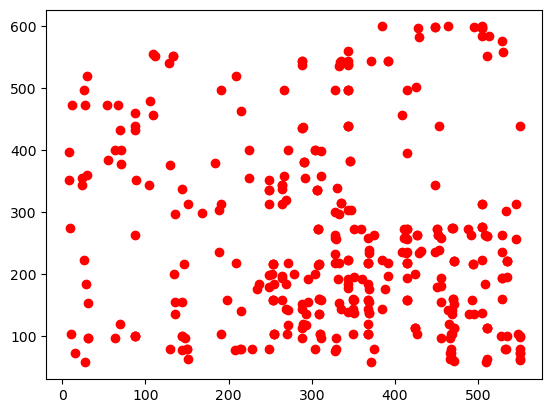

Failed 550
!! Failed 550 out of 918 for layout 0041_02386 !!
0016_03070
Earliest date: 2023-07-21 00:00:00, Latest date: 2023-08-09 23:00:00
Sampler built with 82185 ignition points.


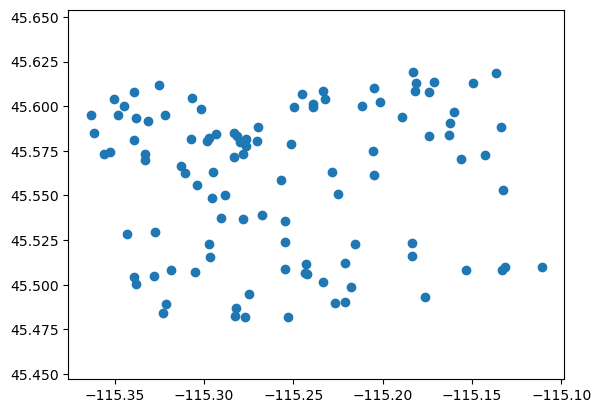

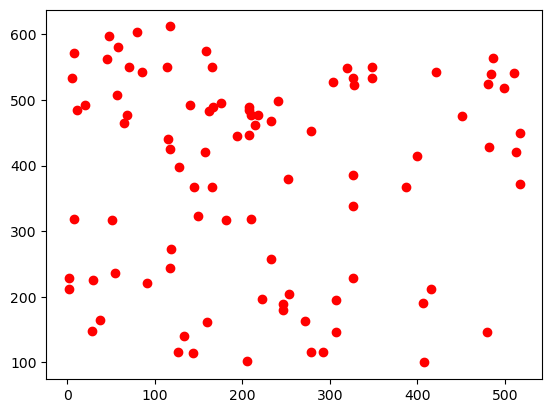

Failed 12
0270_02277
Earliest date: 2023-08-10 00:00:00, Latest date: 2023-08-27 23:00:00
Sampler built with 50236 ignition points.


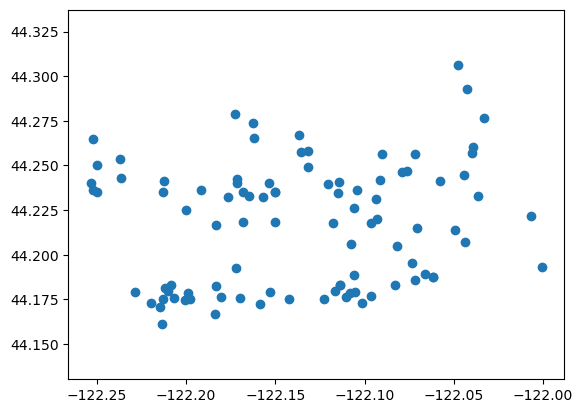

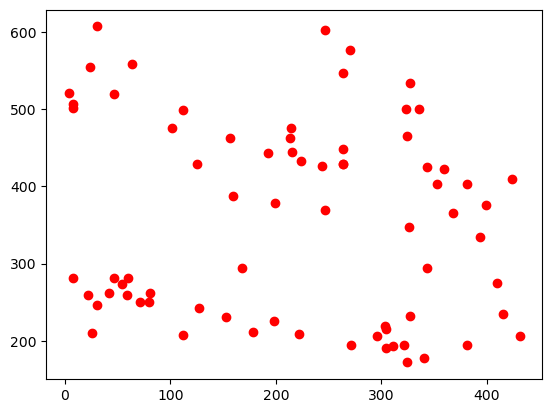

Failed 22
!! Failed 22 out of 95 for layout 0270_02277 !!
0105_03054
Layout ./WideDataset/0105_03054/Satellite_Images_Mask/ does not exist
Error for layout 0105_03054: unconverted data remains:  
0259_02663
Error for layout 0259_02663: unconverted data remains:  
0037_01578
Earliest date: 2022-04-19 00:00:00, Latest date: 2022-05-28 23:00:00
Error processing 0037_00990: No JPG files found in folder: ./WideDataset/0037_01578/Satellite_Images_Mask/0037_00990/
Error processing 0037_00989: No JPG files found in folder: ./WideDataset/0037_01578/Satellite_Images_Mask/0037_00989/
Error processing 0037_00277: No JPG files found in folder: ./WideDataset/0037_01578/Satellite_Images_Mask/0037_00277/
Sampler built with 41686 ignition points.


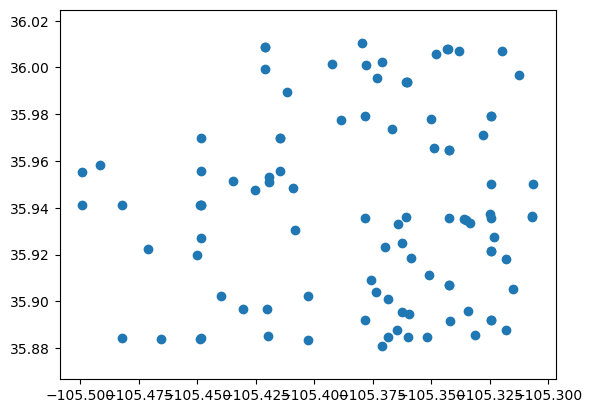

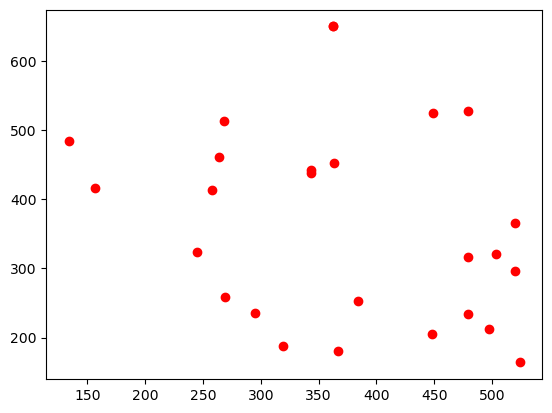

Failed 74
!! Failed 74 out of 100 for layout 0037_01578 !!
0250_02864
Error for layout 0250_02864: unconverted data remains:  
0252_02927
Error for layout 0252_02927: unconverted data remains:  5
0324_02925
Layout ./WideDataset/0324_02925/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0324_02925/Satellite_Image_Mask/ does not exist
0249_02843
Error for layout 0249_02843: unconverted data remains:  
0004_01191
Earliest date: 2023-04-01 00:00:00, Latest date: 2023-04-21 23:00:00
Sampler built with 134452 ignition points.


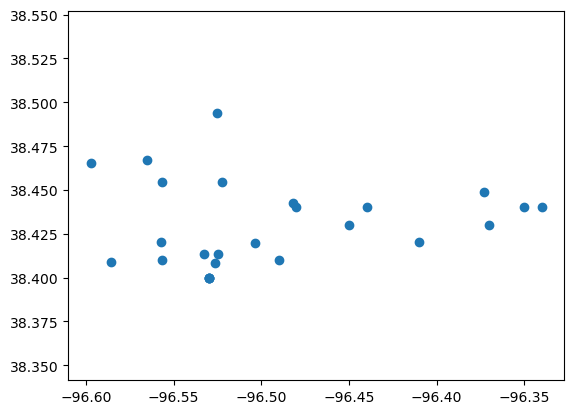

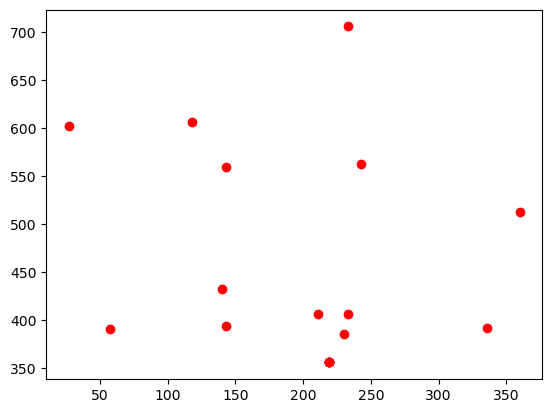

Failed 9
!! Failed 9 out of 26 for layout 0004_01191 !!
0243_02722
Layout ./WideDataset/0243_02722/Satellite_Images_Mask/ does not exist
Error for layout 0243_02722: unconverted data remains:  
0251_02843
Error for layout 0251_02843: unconverted data remains:  
0019_01316
Earliest date: 2023-04-01 00:00:00, Latest date: 2023-04-21 23:00:00
Sampler built with 133355 ignition points.


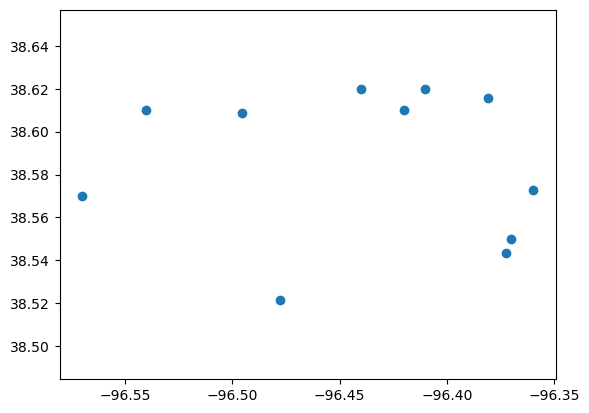

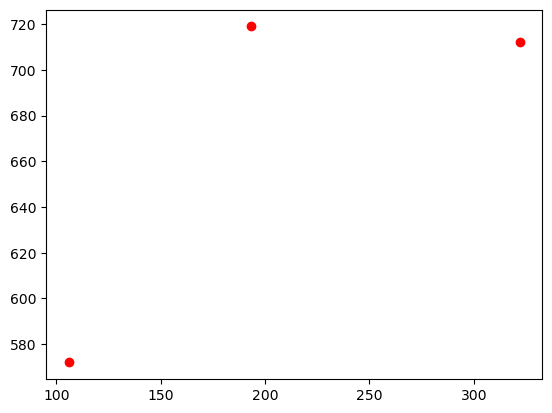

Failed 8
!! Failed 8 out of 11 for layout 0019_01316 !!
0013_01466
Earliest date: 2022-03-28 00:00:00, Latest date: 2022-04-20 23:00:00
Sampler built with 143276 ignition points.


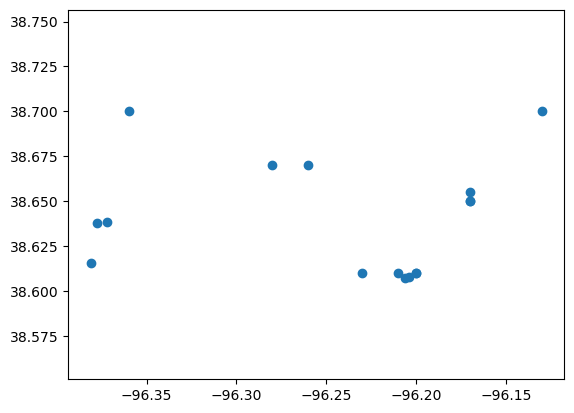

Scenario 0013_00258 has the wrong size for layout 0013_01466: 776 != 472 or 816 != 491


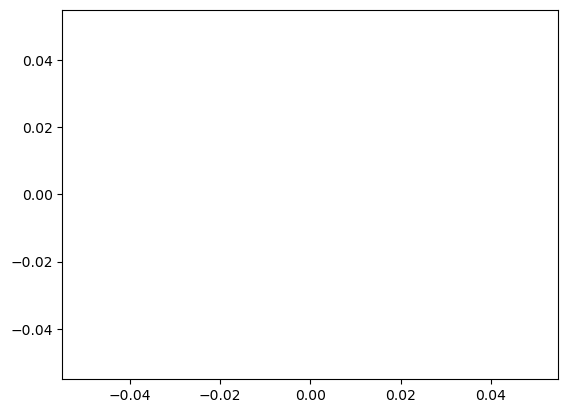

Failed 0
0012_02094
Earliest date: 2022-03-28 00:00:00, Latest date: 2022-04-20 23:00:00
Sampler built with 216358 ignition points.


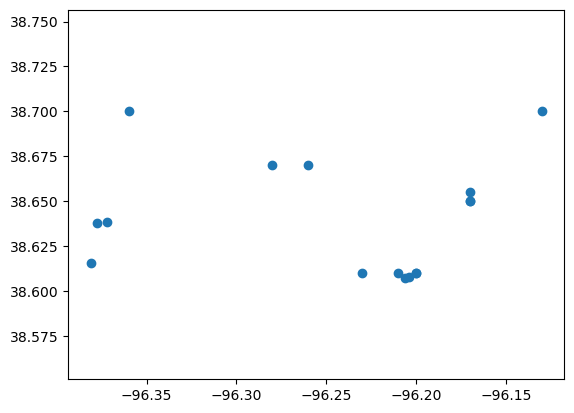

Scenario 0012_00907 has the wrong size for layout 0012_02094: 776 != 539 or 816 != 580


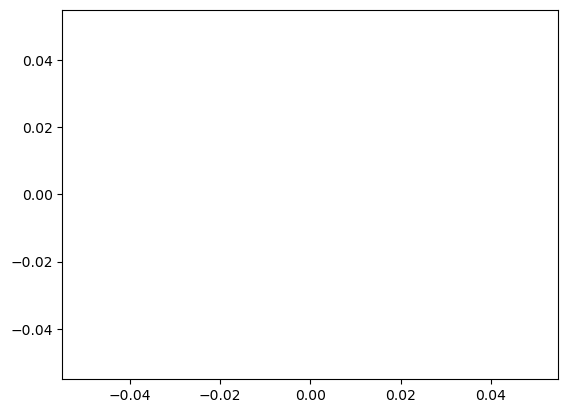

Failed 0
0248_01962
Error for layout 0248_01962: unconverted data remains:  
0067_03550
Error for layout 0067_03550: unconverted data remains:  
0246_00984
Error for layout 0246_00984: unconverted data remains:  
0084_02609
Error for layout 0084_02609: unconverted data remains:  5
0247_03453
Error for layout 0247_03453: unconverted data remains:  
0065_03061
Layout ./WideDataset/0065_03061/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0065_03061/Satellite_Image_Mask/ does not exist
0064_02717
Layout ./WideDataset/0064_02717/Satellite_Images_Mask/ does not exist
Error for layout 0064_02717: unconverted data remains:  
0066_03773
Layout ./WideDataset/0066_03773/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0066_03773/Satellite_Image_Mask/ does not exist
0069_03539
Layout ./WideDataset/0069_03539/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0069_03539/Satellite_Image_Mask/ does not exist
0059_02804
Layout ./WideDataset/0059_02804/Satellite_Images_Ma

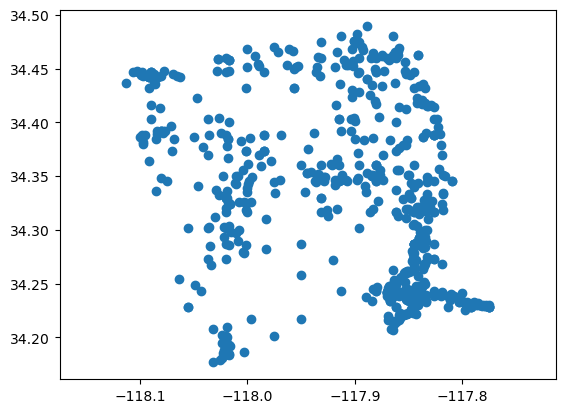

Scenario 0102_00647 has the wrong size for layout 0102_01733: 846 != 565 or 1046 != 555


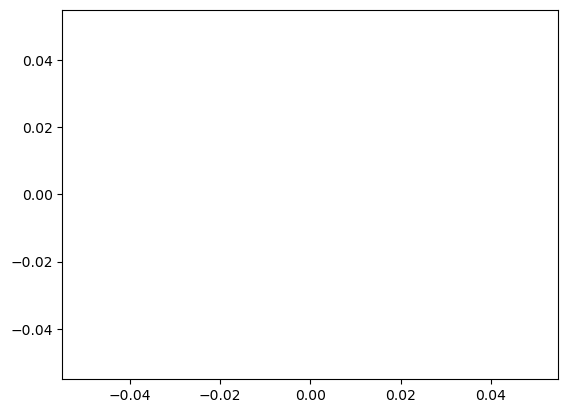

Failed 0
0103_01810
Earliest date: 2020-09-05 00:00:00, Latest date: 2020-09-28 23:00:00
Sampler built with 55126 ignition points.


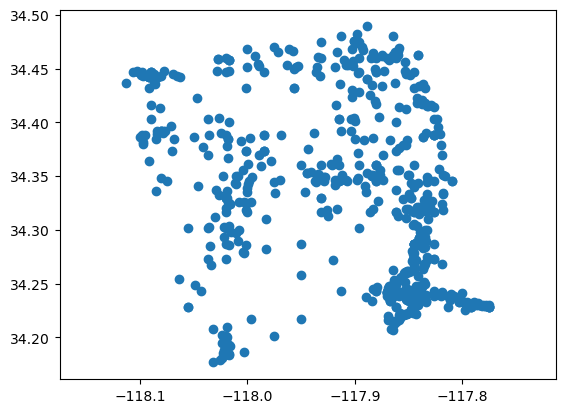

Scenario 0103_00524 has the wrong size for layout 0103_01810: 846 != 591 or 1046 != 638


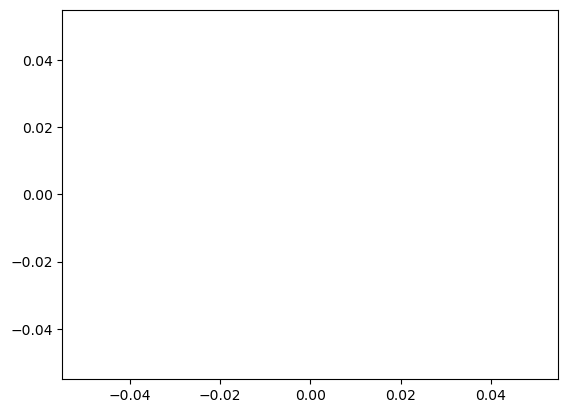

Failed 0
0068_04211
Layout ./WideDataset/0068_04211/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0068_04211/Satellite_Image_Mask/ does not exist
0082_03155
Error for layout 0082_03155: unconverted data remains:  5
0261_02900
Error for layout 0261_02900: unconverted data remains:  
0057_03186
Layout ./WideDataset/0057_03186/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0057_03186/Satellite_Image_Mask/ does not exist
0090_00987
Earliest date: 2020-08-14 00:00:00, Latest date: 2020-09-01 23:00:00
Sampler built with 19427 ignition points.


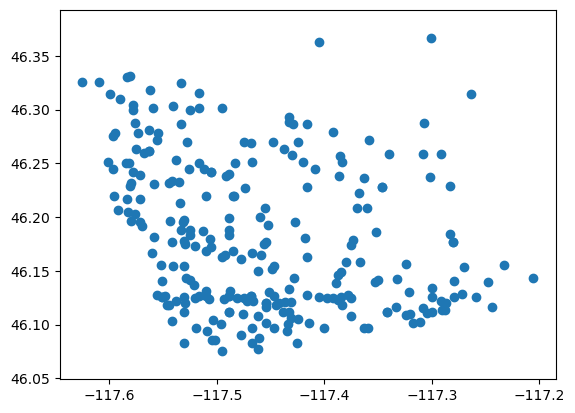

Scenario 0090_00947 has the wrong size for layout 0090_00987: 931 != 555 or 1009 != 505


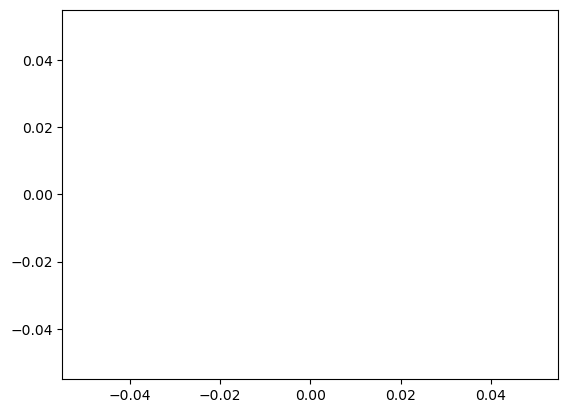

Failed 0
0242_02940
Layout ./WideDataset/0242_02940/Satellite_Images_Mask/ does not exist
Error for layout 0242_02940: unconverted data remains:  
0245_03988
Layout ./WideDataset/0245_03988/Satellite_Images_Mask/ does not exist
Layout ./WideDataset/0245_03988/Satellite_Image_Mask/ does not exist
0081_03471
Error for layout 0081_03471: unconverted data remains:  
0060_03010
Layout ./WideDataset/0060_03010/Satellite_Images_Mask/ does not exist
Error for layout 0060_03010: unconverted data remains:  6
0062_03187
Layout ./WideDataset/0062_03187/Satellite_Images_Mask/ does not exist
Error for layout 0062_03187: unconverted data remains:  5
0262_03319
Error for layout 0262_03319: unconverted data remains:  
0260_03391
Error for layout 0260_03391: unconverted data remains:  
0058_03866
Layout ./WideDataset/0058_03866/Satellite_Images_Mask/ does not exist
Error for layout 0058_03866: unconverted data remains:  
0244_03110
Layout ./WideDataset/0244_03110/Satellite_Images_Mask/ does not exist
Er

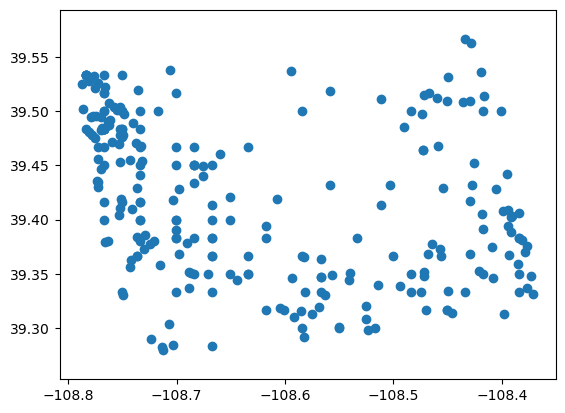

Scenario 0094_00038 has the wrong size for layout 0094_01688: 1102 != 494 or 977 != 534


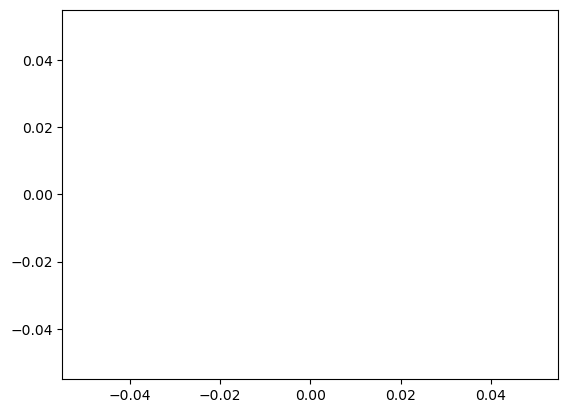

Failed 0
0095_01726
Earliest date: 2020-08-01 00:00:00, Latest date: 2020-08-31 23:00:00
Sampler built with 36114 ignition points.


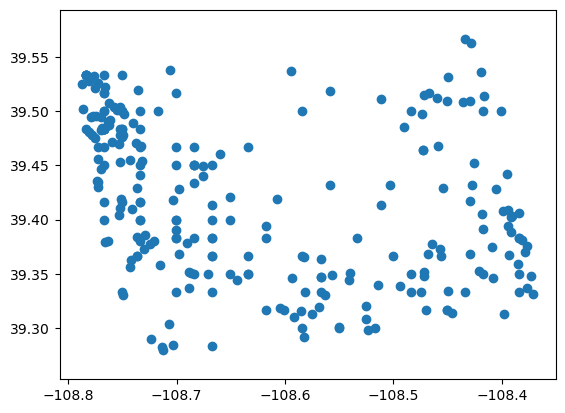

Scenario out210_2_ArrivalTime has the wrong size for layout 0095_01726: 1102 != 558 or 977 != 487


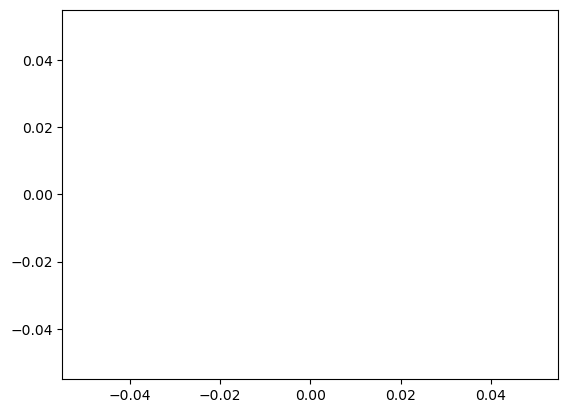

Failed 0
0093_01748
Earliest date: 2020-08-01 00:00:00, Latest date: 2020-08-31 23:00:00
Sampler built with 42163 ignition points.


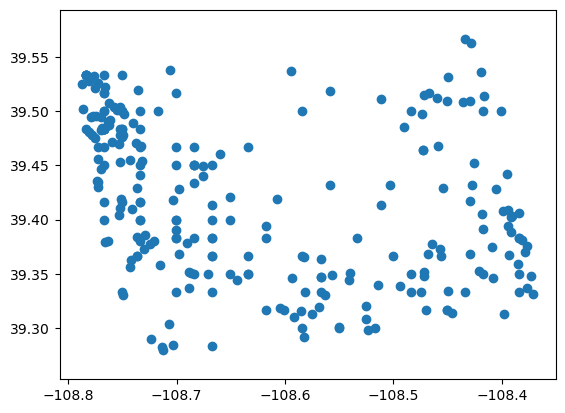

Scenario 0093_01168 has the wrong size for layout 0093_01748: 1102 != 492 or 977 != 514


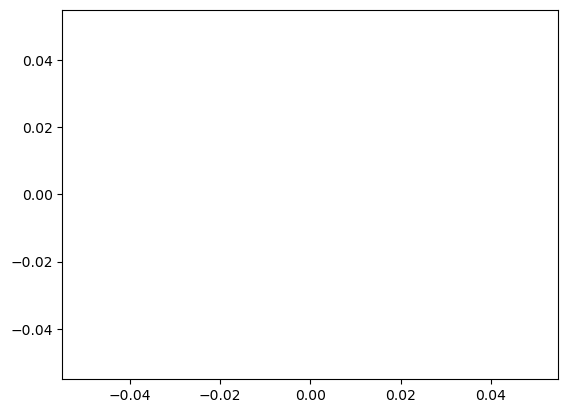

Failed 0
0083_02892
Error for layout 0083_02892: unconverted data remains:  
0021_01232
Earliest date: 2022-03-31 00:00:00, Latest date: 2022-04-28 23:00:00
Error processing 0021_00124: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00124/
Error processing 0021_00123: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00123/
Error processing 0021_00125: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00125/
Error processing 0021_00655: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00655/
Error processing 0021_00035: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00035/
Error processing 0021_00092: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00092/
Error processing 0021_00830: No JPG files found in folder: ./WideDataset/0021_01232/Satellite_Images_Mask/0021_00830/
Error processing 

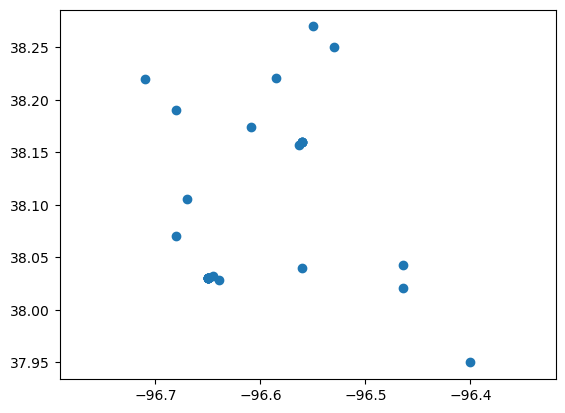

Scenario 0021_00115 has the wrong size for layout 0021_01232: 1124 != 555 or 1317 != 570


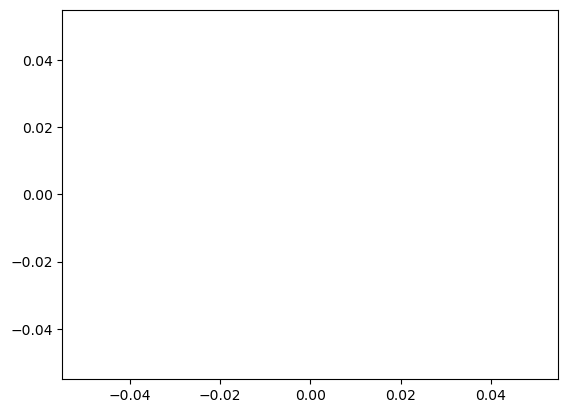

Failed 0
0020_00970
Earliest date: 2022-03-31 00:00:00, Latest date: 2022-04-28 23:00:00
Sampler built with 95106 ignition points.


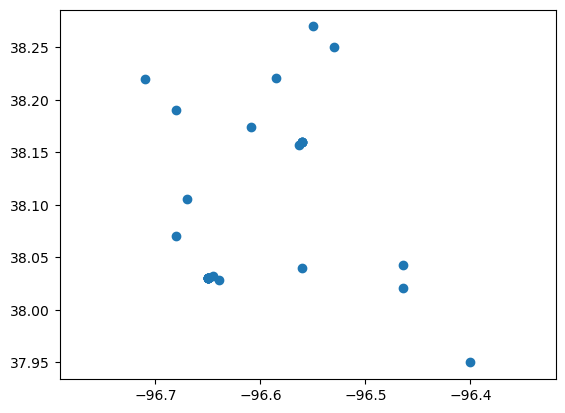

Scenario 0020_00276 has the wrong size for layout 0020_00970: 1124 != 499 or 1317 != 573


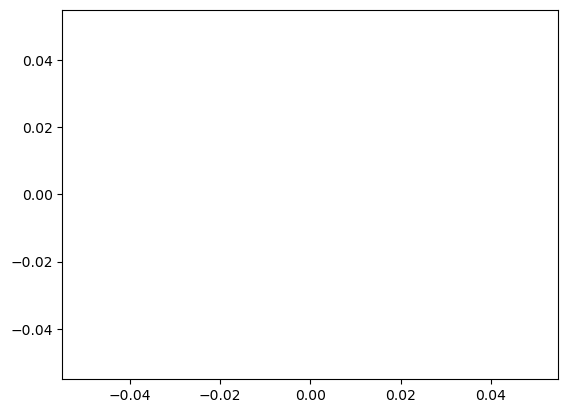

Failed 0
0063_02387
Layout ./WideDataset/0063_02387/Satellite_Images_Mask/ does not exist
Error for layout 0063_02387: unconverted data remains:  5
0061_03726
Layout ./WideDataset/0061_03726/Satellite_Images_Mask/ does not exist
Error for layout 0061_03726: unconverted data remains:  
0100_02449
Earliest date: 2020-09-05 00:00:00, Latest date: 2020-09-28 23:00:00
Sampler built with 36174 ignition points.


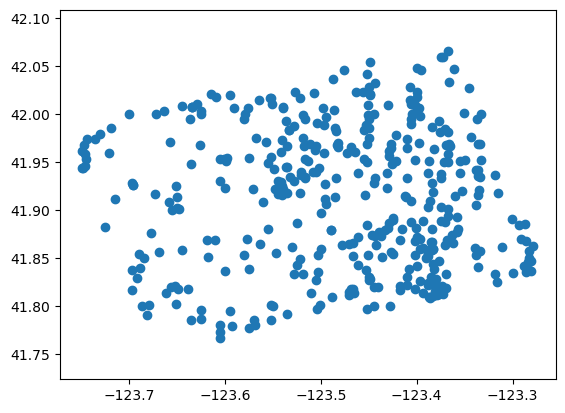

Scenario 0100_01361 has the wrong size for layout 0100_02449: 1163 != 572 or 945 != 471


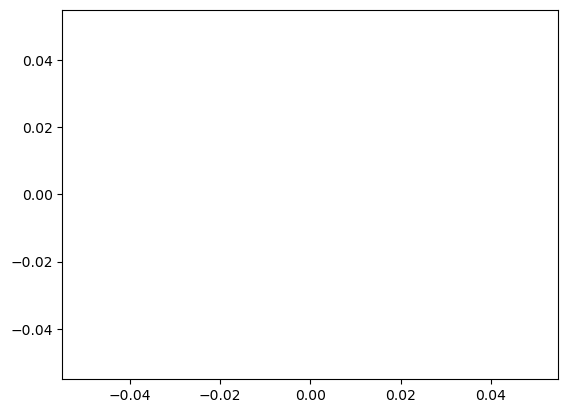

Failed 0
0098_01784
Earliest date: 2020-09-05 00:00:00, Latest date: 2020-09-28 23:00:00
Sampler built with 32471 ignition points.


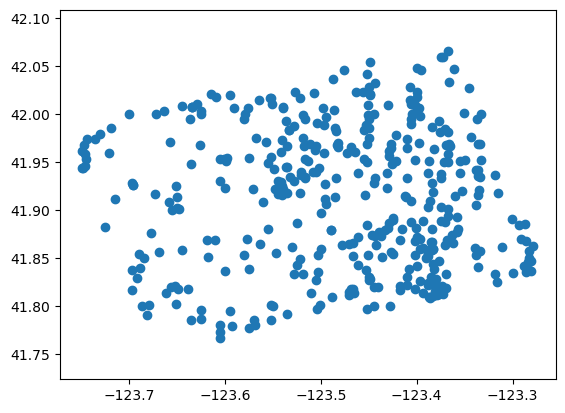

Scenario 0098_01539 has the wrong size for layout 0098_01784: 1163 != 520 or 945 != 487


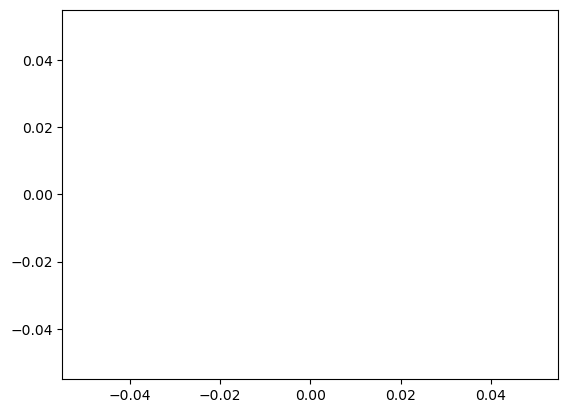

Failed 0
0048_01141
Earliest date: 2022-03-27 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 55838 ignition points.


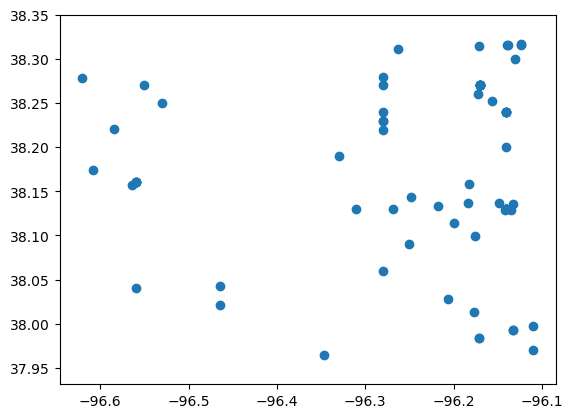

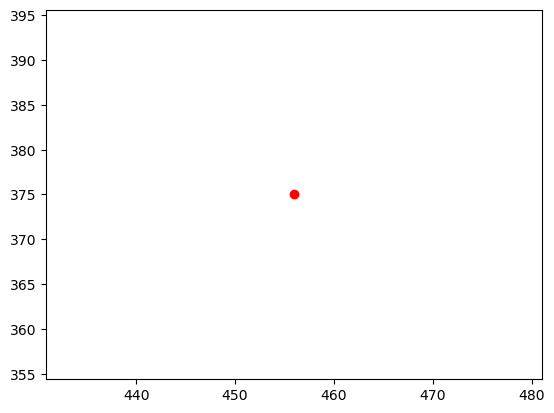

Failed 72
!! Failed 72 out of 73 for layout 0048_01141 !!
0047_05424
Earliest date: 2022-03-27 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 260805 ignition points.


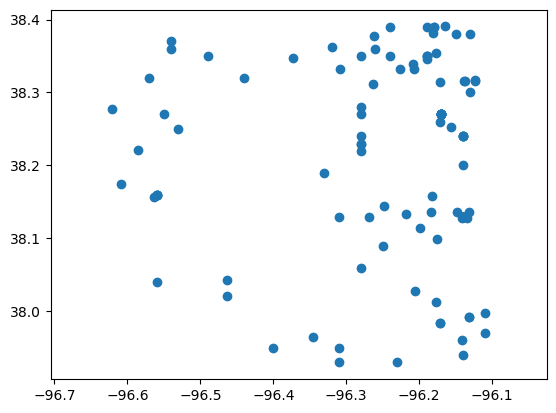

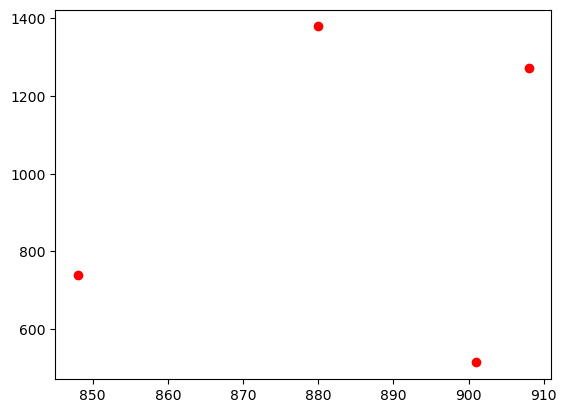

Failed 103
!! Failed 103 out of 107 for layout 0047_05424 !!
0049_01289
Earliest date: 2022-03-27 00:00:00, Latest date: 2022-04-23 23:00:00
Sampler built with 56643 ignition points.


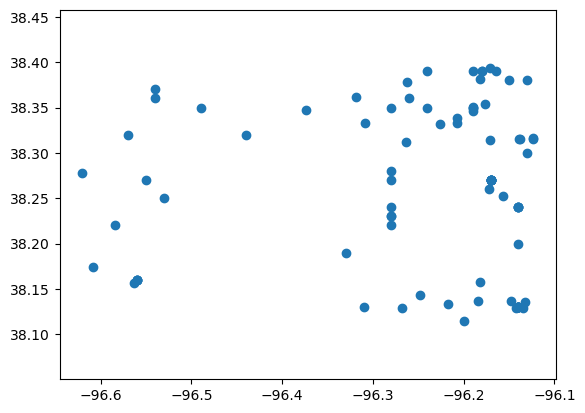

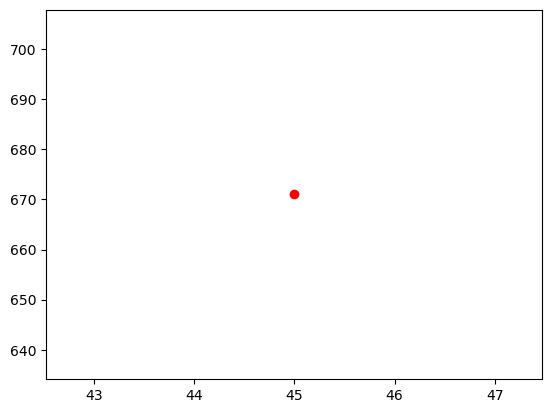

Failed 86
!! Failed 86 out of 87 for layout 0049_01289 !!
0114_02292
Error for layout 0114_02292: unconverted data remains:  5
0113_03495
Error for layout 0113_03495: unconverted data remains:  
0258_02858
Error for layout 0258_02858: unconverted data remains:  
0257_02175
Error for layout 0257_02175: unconverted data remains:  
0253_03246
Error for layout 0253_03246: unconverted data remains:  5
0255_02103
Error for layout 0255_02103: unconverted data remains:  
0254_02361
Error for layout 0254_02361: unconverted data remains:  
0256_02752
Error for layout 0256_02752: unconverted data remains:  
110
131


In [49]:
# Get the layout coordinates 
# 1 extract the tif files
dataset_path = "./WideDataset/"

# copy the layout tifs from a folder to a folder called sim2real_layout
tif_path = "sim2real_layouts"
os.makedirs(tif_path, exist_ok=True)
for folder in os.listdir(dataset_path):
    if folder == ".DS_Store":
        continue
    shutil.copy(f"WideDataset/{folder}/Vegetation_Map/Existing_Vegetation_Cover.tif", f"{tif_path}/{folder}_Existing_Vegetation_Cover.tif")

print("Copied the layout tifs to sim2real_layouts")
####

tif_files = glob(os.path.join(tif_path, "*.tif"))
layout_list = []
widths = []
names = []
for tif_file in tif_files:
    with rasterio.open(tif_file) as dataset:
        # get the file name without the path
        file_name = os.path.basename(tif_file)  # '0004_Elevation.tif'
        identifier = "_".join(file_name.split('_')[:2])

        # extract the resolution, check it is 30
        x_resolution = dataset.transform[0]
        y_resolution = -dataset.transform[4]
        assert x_resolution == y_resolution == 30, f"Resolution is not the same: {x_resolution} != {y_resolution}"

        # extract the coordinates using the bounds
        # /!\ DO NOT USE transform_bounds(dataset.crs, 'EPSG:4326', *dataset.bounds)
        x_min = dataset.bounds[0]
        x_max = dataset.bounds[2]
        y_min = dataset.bounds[1]
        y_max = dataset.bounds[3]

        transformer = Transformer.from_crs(dataset.crs, "EPSG:4326", always_xy=True)
        lat_top_left, lon_top_left = transformer.transform(x_min, y_max)
        lat_top_right, lon_top_right = transformer.transform(x_max, y_max)
        lat_bottom_left, lon_bottom_left = transformer.transform(x_min, y_min)
        lat_bottom_right, lon_bottom_right = transformer.transform(x_max, y_min)

        # Create the polygon using the transformed bounds
        polygon = Polygon((
            (lat_top_left, lon_top_left),
            (lat_top_right, lon_top_right),
            (lat_bottom_right, lon_bottom_right),
            (lat_bottom_left, lon_bottom_left),
            (lat_top_left, lon_top_left)  # close the polygon
        ))

        layout_list.append({
            'identifier': identifier,
            'height': dataset.height,
            'width': dataset.width,
            'geometry': polygon,
            'transformer': transformer,
            'dataset': dataset
        })


        widths.append(dataset.width)
        names.append(identifier)

sorted_indices = np.argsort(widths)
widths = np.array(widths)[sorted_indices]
names = np.array(names)[sorted_indices]
filtered_layout_list = [layout_list[i] for i in sorted_indices]

n_small_layouts = len(widths[widths < 500])
n_medium_layouts = len(widths[(widths >= 500) & (widths < 1000)])
n_large_layouts = len(widths[widths >= 1000])

small_layouts = filtered_layout_list[:n_small_layouts]
medium_layouts = filtered_layout_list[n_small_layouts:n_small_layouts + n_medium_layouts]
large_layouts = filtered_layout_list[n_small_layouts + n_medium_layouts:]

print("loaded the layout list")


# convert the layout list to a geopandas df
gdf = gpd.GeoDataFrame(layout_list, geometry='geometry', crs="EPSG:4326")




# Load the historical fires 
fires_gdf = gpd.read_file("./FPA_FOD_20210617.gpkg")
fires_gdf = fires_gdf.to_crs("EPSG:4326")
print("loaded the fires")


# Joint
# Spatial join: find which points fall into which polygons
joined = gpd.sjoin(fires_gdf, gdf, how='inner', predicate='within')


# Count points per polygon
counts = joined.groupby('identifier').size().reset_index(name='fire_count')


dataset_path = "./WideDataset/"
scenario_path_suffix = "/Satellite_Images_Mask/"

failed_layouts = []
continue_out = False
processed = total = 0

for layout_name in names:
    total+=1
    print(layout_name)
    try:
        layout_folder = dataset_path + layout_name + scenario_path_suffix
        # check the layout folder exists
        if not os.path.exists(layout_folder):
            print(f"Layout {layout_folder} does not exist")
            layout_folder = dataset_path + layout_name +  "/Satellite_Image_Mask/"
            if not os.path.exists(layout_folder):
                print(f"Layout {layout_folder} does not exist")
                failed_layouts.append(layout_name)
                continue
        
        if os.path.exists(f"./WideDataset/{layout_name}/selected_scenarios.txt"):
            processed +=1
            #continue

        # check that the scenario have the right size
        first_scenario = return_first_scenario(layout_folder)
        if first_scenario is None:
            print(f"Layout {layout_name} does not have any scenario")
            failed_layouts.append(layout_name)
            continue
        
        first_loaded_scenario = load_scenario(os.path.join(layout_folder, first_scenario), extension = '.jpg', first_frame_only=True)
        height_scenario, width_scenario = first_loaded_scenario.shape[0], first_loaded_scenario.shape[1]

        earliest_date, latest_date = find_earliest_latest_dates(dataset_path + layout_name)
        print(f"Earliest date: {earliest_date}, Latest date: {latest_date}")

        sampler = ScenarioSampler(layout_folder, extension = '.jpg')
        sampled_scenarios = []
        sampled_ignition_points = []
        associated_fires = []
        date_matched = []
        distances = []
        failed = 0
        # plot the historical fires
        data = joined[joined['identifier'] == layout_name]
        plt.scatter(data["LONGITUDE"], data["LATITUDE"])
        plt.axis("equal")
        plt.show()

        # start with the fires that have potewntial to be test fires, i.e their date is between the earliest and latest date
        # We will have one "test" dataset, one "train" dataset, and one extra train dataset for the test fires
        # filtered_data = data[
        # (data['DISCOVERY_DATE'].dt.date >= earliest_date.date()) & 
        # (data['DISCOVERY_DATE'].dt.date <= latest_date.date())
        # ]
        

        for i, fire in data.iterrows():
            # print the coordinates of the fire
            width, height = fire['width'], fire['height']
            # check that the scenario have the right size
            if width != width_scenario or height != height_scenario:
                print(f"Scenario {first_scenario} has the wrong size for layout {layout_name}: {width} != {width_scenario} or {height} != {height_scenario}")
                failed_layouts.append(layout_name)
                break
            dataset = fire['dataset']
            transformer = fire['transformer']
            x_fire, y_fire = transformer.transform(fire['LONGITUDE'], fire['LATITUDE'], direction='INVERSE')
            row, col = rasterio.transform.rowcol(dataset.transform, x_fire, y_fire)
            # print("row, col", row, col)
            ignition_point = (col, row)
            sample, sampled_ignition_point = sampler.get_scenario_location(ignition_point, leeway_distance=5, sampling_method='closest', exclude_scenarios=sampled_scenarios)
            if sample is None:
                failed += 1
                continue
            sampled_scenarios.append(sample)
            sampled_ignition_points.append(sampled_ignition_point)
            associated_fires.append(fire['FOD_ID'])
            distance = abs(sampled_ignition_point[0] - ignition_point[0]) + abs(sampled_ignition_point[1] - ignition_point[1])
            distances.append(distance)
        # plot the sampled scenarios
        # the axes are inverted as coordinates start in (0,0) in the top left corner
        fig, ax = plt.subplots()
        ax.scatter([point[0] for point in sampled_ignition_points], [width - point[1] for point in sampled_ignition_points], color='red')
        plt.show()
        print(f"Failed {failed}")
        # write the selected scenarios in a txt file
        with open(f"./WideDataset/{layout_name}/selected_scenarios.txt", "w") as f:
            for scenario, fire_id in zip(sampled_scenarios, associated_fires):
                f.write(f"{scenario}, {fire_id}\n")
            f.write(f"Failed: {failed}\n")
            failed_percentage = failed / max(len(data),1)
            f.write(f"Failed percentage: {failed_percentage}\n")
        if len(data) == 0 or failed_percentage > 0.2:
            print(f"!! Failed {failed} out of {len(data)} for layout {layout_name} !!")
            failed_layouts.append(layout_name)
    except Exception as e:
        print(f"Error for layout {layout_name}: {e}")
        failed_layouts.append(layout_name)
print(processed)
print(total)
    

# TODO do we need to create the grid manually? I think the raster file will doirectly give you the coordinates within the layout


# for each fire, sample the scenario (space only, and time+space)
# write the identifier in a txt file (one for space only, one for time+space)

# move the scenarios into a selected folder
# "delete" the other scenarios

# train test split with the date












# same with date

In [7]:
from Scenario_sampler import ScenarioSamplerDate
# Get the layout coordinates 
# 1 extract the tif files
dataset_path = "./WideDataset/"

# copy the layout tifs from a folder to a folder called sim2real_layout
tif_path = "sim2real_layouts"
os.makedirs(tif_path, exist_ok=True)
for folder in os.listdir(dataset_path):
    if folder == ".DS_Store":
        continue
    shutil.copy(f"WideDataset/{folder}/Vegetation_Map/Existing_Vegetation_Cover.tif", f"{tif_path}/{folder}_Existing_Vegetation_Cover.tif")

print("Copied the layout tifs to sim2real_layouts")
####

tif_files = glob(os.path.join(tif_path, "*.tif"))
layout_list = []
widths = []
names = []
for tif_file in tif_files:
    with rasterio.open(tif_file) as dataset:
        # get the file name without the path
        file_name = os.path.basename(tif_file)  # '0004_Elevation.tif'
        identifier = "_".join(file_name.split('_')[:2])

        # extract the resolution, check it is 30
        x_resolution = dataset.transform[0]
        y_resolution = -dataset.transform[4]
        assert x_resolution == y_resolution == 30, f"Resolution is not the same: {x_resolution} != {y_resolution}"

        # extract the coordinates using the bounds
        # /!\ DO NOT USE transform_bounds(dataset.crs, 'EPSG:4326', *dataset.bounds)
        x_min = dataset.bounds[0]
        x_max = dataset.bounds[2]
        y_min = dataset.bounds[1]
        y_max = dataset.bounds[3]

        transformer = Transformer.from_crs(dataset.crs, "EPSG:4326", always_xy=True)
        lat_top_left, lon_top_left = transformer.transform(x_min, y_max)
        lat_top_right, lon_top_right = transformer.transform(x_max, y_max)
        lat_bottom_left, lon_bottom_left = transformer.transform(x_min, y_min)
        lat_bottom_right, lon_bottom_right = transformer.transform(x_max, y_min)

        # Create the polygon using the transformed bounds
        polygon = Polygon((
            (lat_top_left, lon_top_left),
            (lat_top_right, lon_top_right),
            (lat_bottom_right, lon_bottom_right),
            (lat_bottom_left, lon_bottom_left),
            (lat_top_left, lon_top_left)  # close the polygon
        ))

        layout_list.append({
            'identifier': identifier,
            'height': dataset.height,
            'width': dataset.width,
            'geometry': polygon,
            'transformer': transformer,
            'dataset': dataset
        })


        widths.append(dataset.width)
        names.append(identifier)

sorted_indices = np.argsort(widths)
widths = np.array(widths)[sorted_indices]
names = np.array(names)[sorted_indices]
filtered_layout_list = [layout_list[i] for i in sorted_indices]

n_small_layouts = len(widths[widths < 500])
n_medium_layouts = len(widths[(widths >= 500) & (widths < 1000)])
n_large_layouts = len(widths[widths >= 1000])

small_layouts = filtered_layout_list[:n_small_layouts]
medium_layouts = filtered_layout_list[n_small_layouts:n_small_layouts + n_medium_layouts]
large_layouts = filtered_layout_list[n_small_layouts + n_medium_layouts:]

print("loaded the layout list")


# convert the layout list to a geopandas df
gdf = gpd.GeoDataFrame(layout_list, geometry='geometry', crs="EPSG:4326")




# Load the historical fires 
# fires_gdf = gpd.read_file("./FPA_FOD_20210617.gpkg")
# fires_gdf = fires_gdf.to_crs("EPSG:4326")
print("loaded the fires")


# Joint
# Spatial join: find which points fall into which polygons
joined = gpd.sjoin(fires_gdf, gdf, how='inner', predicate='within')


# Count points per polygon
counts = joined.groupby('identifier').size().reset_index(name='fire_count')


dataset_path = "./WideDataset/"
scenario_path_suffix = "/Satellite_Images_Mask/"

failed_layouts = []
continue_out = False
processed = total = 0

for layout_name in names:
    total+=1
    print(layout_name)
    try:
        layout_folder = dataset_path + layout_name + scenario_path_suffix
        # check the layout folder exists
        if not os.path.exists(layout_folder):
            print(f"Layout {layout_folder} does not exist")
            layout_folder = dataset_path + layout_name +  "/Satellite_Image_Mask/"
            if not os.path.exists(layout_folder):
                print(f"Layout {layout_folder} does not exist")
                failed_layouts.append(layout_name)
                continue
        
        if os.path.exists(f"./WideDataset/{layout_name}/selected_scenarios.txt"):
            processed +=1
            #continue

        # check that the scenario have the right size
        first_scenario = return_first_scenario(layout_folder)
        if first_scenario is None:
            print(f"Layout {layout_name} does not have any scenario")
            failed_layouts.append(layout_name)
            continue
        
        first_loaded_scenario = load_scenario(os.path.join(layout_folder, first_scenario), extension = '.jpg', first_frame_only=True)
        height_scenario, width_scenario = first_loaded_scenario.shape[0], first_loaded_scenario.shape[1]

        earliest_date, latest_date = find_earliest_latest_dates(dataset_path + layout_name)
        print(f"Earliest date: {earliest_date}, Latest date: {latest_date}")

        # plot the historical fires
        data = joined[joined['identifier'] == layout_name]

        filtered_data = data[
        (data['DISCOVERY_DATE'].dt.date >= earliest_date.date()) & 
        (data['DISCOVERY_DATE'].dt.date <= latest_date.date())
        ]

        if len(filtered_data) == 0:
            print(f"No fires found for layout {layout_name} between {earliest_date} and {latest_date}")
            print("example  fire date:", data['DISCOVERY_DATE'].iloc[0])
            failed_layouts.append(layout_name)
            continue

        sampler = ScenarioSamplerDate(layout_folder, extension = '.jpg')
        sampled_scenarios = []
        sampled_ignition_points = []
        associated_fires = []
        date_matched = []
        distances = []
        failed = 0
        

        plt.scatter(filtered_data["LONGITUDE"], filtered_data["LATITUDE"])
        plt.axis("equal")
        plt.show()

        # start with the fires that have potewntial to be test fires, i.e their date is between the earliest and latest date
        # We will have one "test" dataset, one "train" dataset, and one extra train dataset for the test fires

        

        for i, fire in filtered_data.iterrows():
            # print the coordinates of the fire
            width, height = fire['width'], fire['height']
            # check that the scenario have the right size
            if width != width_scenario or height != height_scenario:
                print(f"Scenario {first_scenario} has the wrong size for layout {layout_name}: {width} != {width_scenario} or {height} != {height_scenario}")
                failed_layouts.append(layout_name)
                break
            dataset = fire['dataset']
            transformer = fire['transformer']
            x_fire, y_fire = transformer.transform(fire['LONGITUDE'], fire['LATITUDE'], direction='INVERSE')
            row, col = rasterio.transform.rowcol(dataset.transform, x_fire, y_fire)
            date = fire['DISCOVERY_DATE']
            # print("row, col", row, col)
            ignition_point = (col, row)
            sample, sampled_ignition_point = sampler.get_scenario_location(ignition_point, date = fire['DISCOVERY_DATE'], leeway_distance=5, leeway_date=1, sampling_method='closest', exclude_scenarios=sampled_scenarios)
            if sample is None:
                failed += 1
                continue
            sampled_scenarios.append(sample)
            sampled_ignition_points.append(sampled_ignition_point)
            associated_fires.append(fire['FOD_ID'])
            distance = abs(sampled_ignition_point[0] - ignition_point[0]) + abs(sampled_ignition_point[1] - ignition_point[1])
            distances.append(distance)
        # plot the sampled scenarios
        # the axes are inverted as coordinates start in (0,0) in the top left corner
        fig, ax = plt.subplots()
        ax.scatter([point[0] for point in sampled_ignition_points], [width - point[1] for point in sampled_ignition_points], color='red')
        plt.show()
        print(f"Failed {failed}")
        # write the selected scenarios in a txt file
        with open(f"./WideDataset/{layout_name}/selected_scenarios.txt", "w") as f:
            for scenario, fire_id in zip(sampled_scenarios, associated_fires):
                f.write(f"{scenario}, {fire_id}\n")
            f.write(f"Failed: {failed}\n")
            failed_percentage = failed / max(len(data),1)
            f.write(f"Failed percentage: {failed_percentage}\n")
        if len(data) == 0 or failed_percentage > 0.2:
            print(f"!! Failed {failed} out of {len(data)} for layout {layout_name} !!")
            failed_layouts.append(layout_name)
    except Exception as e:
        print(f"Error for layout {layout_name}: {e}")
        failed_layouts.append(layout_name)
print(processed)
print(total)
    

# TODO do we need to create the grid manually? I think the raster file will doirectly give you the coordinates within the layout


# for each fire, sample the scenario (space only, and time+space)
# write the identifier in a txt file (one for space only, one for time+space)

# move the scenarios into a selected folder
# "delete" the other scenarios

# train test split with the date









Copied the layout tifs to sim2real_layouts
loaded the layout list
loaded the fires
0101_02057
Earliest date: 2020-09-02 00:00:00, Latest date: 2020-09-23 23:00:00
No fires found for layout 0101_02057 between 2020-09-02 00:00:00 and 2020-09-23 23:00:00
example  fire date: 1992-07-17 00:00:00+00:00
0279_03823
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-07 23:00:00
No fires found for layout 0279_03823 between 2021-07-07 00:00:00 and 2021-08-07 23:00:00
example  fire date: 2005-09-20 00:00:00+00:00
0280_03717
Earliest date: 2021-07-07 00:00:00, Latest date: 2021-08-07 23:00:00
No fires found for layout 0280_03717 between 2021-07-07 00:00:00 and 2021-08-07 23:00:00
example  fire date: 2005-09-20 00:00:00+00:00
0014_00426
Earliest date: 2023-07-21 00:00:00, Latest date: 2023-08-09 23:00:00
No fires found for layout 0014_00426 between 2023-07-21 00:00:00 and 2023-08-09 23:00:00
example  fire date: 2005-08-05 00:00:00+00:00
0002_00714
Earliest date: 2023-07-25 00:00:00, Latest dat

In [54]:
print([(a,b) for (a,b) in fire.items()])

[('FOD_ID', 400389827), ('FPA_ID', 'ICS209_2018_9225274'), ('SOURCE_SYSTEM_TYPE', 'INTERAGCY'), ('SOURCE_SYSTEM', 'IA-ICS209'), ('NWCG_REPORTING_AGENCY', 'ST/C&L'), ('NWCG_REPORTING_UNIT_ID', 'USKSCSX'), ('NWCG_REPORTING_UNIT_NAME', 'Chase County'), ('SOURCE_REPORTING_UNIT', 'KSCSX'), ('SOURCE_REPORTING_UNIT_NAME', 'Chase County'), ('LOCAL_FIRE_REPORT_ID', None), ('LOCAL_INCIDENT_ID', '000602'), ('FIRE_CODE', 'LP0G'), ('FIRE_NAME', '190 AND YY RD'), ('ICS_209_PLUS_INCIDENT_JOIN_ID', '2018_9225274_190 AND YY RD'), ('ICS_209_PLUS_COMPLEX_JOIN_ID', None), ('MTBS_ID', 'KS3834709637320180419'), ('MTBS_FIRE_NAME', '190 AND YY RD'), ('COMPLEX_NAME', None), ('FIRE_YEAR', 2018), ('DISCOVERY_DATE', Timestamp('2018-04-19 00:00:00+0000', tz='UTC')), ('DISCOVERY_DOY', 109), ('DISCOVERY_TIME', '1258'), ('NWCG_CAUSE_CLASSIFICATION', 'Human'), ('NWCG_GENERAL_CAUSE', 'Missing data/not specified/undetermined'), ('NWCG_CAUSE_AGE_CATEGORY', None), ('CONT_DATE', None), ('CONT_DOY', nan), ('CONT_TIME', None

NameError: name 'fire' is not defined